# (E13) 주식 종목 가격 예측하기
- 일시: 2021.02.25

*****

## Time-Series Prediction의 기법 중 하나인 ARIMA에 대해 알아보고 특정 주식 종목의 가격을 예측해보자!

*****

# 개념설명
## 1. 시계열(Time-Series)
\begin{align}
Y ={Y_t : t\in T},\ where\ T\ is\ the\ index\ set \\
\end{align}

- **시간 순서대로 발생한 데이터의 수열.**    


- **미래를 예측하려면 과거 데이터에 일정 패턴이 있어야 하고 미래에도 동일하게 반복되어야 함.**    
 **--> Stationary 데이터에 대해서만 미래 예측이 가능!**    


- **Stationary(안정적)이라는 것 = 시계열 데이터의 통계적 특성이 변하지 않는다는 것.**    
 **--> 시간의 변화와 무관하게 일정한 프로세스가 존재함.**    
 **--> 외부적 변수에 의해 시계열 데이터 분석의 전제인 Stationary가 훼손될 수 있음.**    

> **<Stationary 시계열 데이터의 3가지 요소>**       
> **1. 시간의 추이와 관계없이 평균이 불변.**    
> ![title](https://i2.wp.com/www.dodomira.com/wp-content/uploads/2016/04/Mean_nonstationary.png?w=586)
> **2. 시간의 추이와 관계 없이 분산이 불변.**    
> ![title](https://i1.wp.com/www.dodomira.com/wp-content/uploads/2016/04/Var_nonstationary.png?w=577)
> **3. 두 시점 간의 공분산이 기준시점과 무관.**    
> ![title](https://i1.wp.com/www.dodomira.com/wp-content/uploads/2016/04/Cov_nonstationary.png?w=566)
> **--> 예측이 의미있으려면 시점(t)와 무관하게 예측이 맞아떨어져야 함.**    
> **--> t와 무관하게 과거 데이터의 평균, 분산이 일정 범위 안에 있어야 함.**    
> **--> 시간(h)을 약간 움직일 때도 t와는 무관하게 h에 대해서만 달라지는 일정한 상관도가 필요.**    
> **--> 그렇지 않으면 시계열 예측은 그때그때 달라지게 됨.**    


> **<통계 용어 정리>**
> - **평균(Mean): 확률변수의 분포 중간 부분.**    
> - **분산(Variance): 확률변수의 분포가 얼마나 퍼져있는지.**    
> - **공분산(Covariance): 확률변수가 2가지일때, 어떤 모양으로 퍼져있는지.**    
> - **상관계수(Correlation): 단위 크기에 영향을 많이 받는 공분산을 보안하기 위해 나온 개념으로, 확률변수의 절대적 크기에 영향을 받지 않도록 단위화 시킨 것. = 분산의 크기만큼 나누기.**    
> - **자기공분산(Autovariance): 공분산에서 자기 자신을 공분산. 약간 움직인 자기 자신과의 공분산.**    
> - **자기상관계수(Autocorrelation): 자기공분산을 정규화한 것.**    
> - **이동평균(Moving Average): 수의 집합에서 특정 크기의 부분 집합을 연속적으로 이동하며 산출한 평균. 일정한 크기의 부분집합을 평균 계산에 활용함.**    
> - **이동표준편차(Moving std): 수의 집합에서 특정 크기의 부분 집합을 연속적으로 이동하며 산출한 표준편차(산포도, 분산의 양의 제곱근).**    

## 2. Stationary 여부를 체크하는 통계적 방법
## - Augmented Dickey-Fuller Test(ADF Test)
- **시계열 데이터의 안정성을 테스트하는 통계적인 방법.**    
- **```주어진 시계열 데이터가 안정적이지 않다```는 ```귀무가설```을 세운 후,**     
 **--> 통계적 가설 검증 과정을 통해 이 귀무가설이 기각될 경우에 ```이 시계열 데이터가 안정적이다```라는 ```대립가설```을 채택함.**

> **<통계 용어>**    
> - **귀무가설(Null Hypothesis): "비교하는 값과 차이가 없다, 동일하다."를 기본 개념으로 하는 가설.**   
> - **대립가설(Aternative Hypothesis): 뚜렷한 증거가 있을 때 주장하는 가설.**
> - **P-Value(유의확률): 귀무가설이 참이라고 가정했을 때, 원래 표본으로부터 얻어지는 통계치가 나타날 확률.**
> -**유의수준(significance level):통계적인 가설검정에서 사용되는 기준값. 일반적으로 유의 수준은 α로 표시하고 95%의 신뢰도를 기준으로 한다면 (1−0.95)인 0.05값이 유의수준 값이 됨.**
>> **Ex. 알레산드라는 실험 대상이 네 가지 다른 컵에 담긴 물의 맛을 보고 어떤 컵이 생수병의 물인지 판단하는 실험을 설계하였습니다. 실험 대상에게는 수돗물 세 컵과 생수병 한 컵이 주어졌습니다(순서는 임의로 배치하였습니다). 실험 대상이 생수병의 물이 무엇인지 판단할 때 단순히 추측하는 것보다 더 나은지 궁금해 하였습니다.**    
>> - **귀무가설은 $$H_0: p=0.25$$(생수병의 물을 판단할 확률은 그저 25%(단순추측))**       
>> - **대립가설은 $$H_a: p>0.2$$(생수병의 물을 판단할 확율이 25%보다 높다(맛으로 판단))**  

> **실험 결과 60명 중 20명이 생수병의 물을 정확히 판단. p-vlaue값이 대략 0.0680이라고 함.**        
> **--> 이는 생수병의 물을 단순 추측으로 맞춘다고 가정하고 같은 양으로 샘플링했을 때, 다시 또 60명 중 20명이 생수병의 물을 정확히 판단할 수 있는 확률이 6.8%라는 것.**    
> 
> **--> p-value가 높다는 것은 귀무가설이 참이라는 가정 하에 표본을 추출했을 때, 이런 표본 평균이 관측될 확률이 높다는 것으로 일어날 수 있으니 귀무가설을 기각할 수 없다는 것.    
(귀무가설이 옳다는 증거는 될 수 없지만 적어도 해당 데이터가 안정적인 시계열이라고는 말할 수 없음을 알려줌.)**    
> 
> **--> 반대로 p-value가 낮다는 것은 귀무가설이 참이라는 가정 하에 표본을 추출했을 때 이런 표본 평균이 관측될 확률이 낮다는 것으로 일어날 가능성이 적으니 귀무가설을 기각할 수 있다는 것.**        
> 
> **--> 0.05 미만으로 나오면 p-value만큼의 오류 가능성 하에 귀무가설을 기각하고 대립가설을 채택할 수 있는 근거가 됨.**

## 3. Stationary이라고 할 수 없는 데이터를 Stationary하게 만들기

## - 로그함수 변환
- **시간 추이에 따라 분산이 점점 커지고 있을 때 사용하면 분산이 일정해짐.**

## - Moving average 제거 - 추세(Trend) 상쇄하기
- **추세(Trend): 시간 추이에 따른 평균값 변화**   
- **추세를 제거해주려면 거꾸로 Moving average(rolling mean)을 구해서 로그변환한 값을 빼줌.**    
- **Moving average를 고려할 때는 rolling mean을 구하기 위한 window 크기 결정이 매우 중요**    

## - 차분(Differencing) - 계절성(Seasonality) 상쇄하기
- **계절성(Seasonality): 시계열 데이터 안에 포함된 패턴이 파악되지 않은 주기적 변화는 예측에 방해가 되는 불안정성 요소로, Moving average 제거로는 상쇄되지 않는 계절적, 주기적 패턴.**    
- **차분(Differencing):시계열을 한 스텝 앞으로 옮긴 시계열을 원래 시계열에 빼주는 방법.**    
 **(현재 스텝 값)-(직전 스텝 값)이 되어 이번 스템에 발생한 변화량을 알 수 있음.** 
- **1차 차분(1st order differencing),  2차 차분(2nd order differencing, 차분의 차분), 3차 차분(3rd order differencing, 2차 차분의 차분)을 적용하면 p-value를 더욱 낮출 수도 있음.**

## - 시계열 분해(Time series decomposition)
- **Trend, Seasonality를 직접 분리해낼 수 있는 기능으로, Moving average 제거, differencing 등을 거치지 않고도 훨씬 안정적인 시계열을 분리해 낼 수 있음.**    
- **```Residual```: ```Original```에서 ```Trend```, ```Seasonality```를 제거하고 난 나머지.**    
 **(```Trend + Seasonality + Residual = Original```)**

## 4. ARIMA(Autoregressive Integrated Moving Average) 모델
- **시계열 데이터 예측모델을 자동으로 만들어주는 모델.**    
- **ARIMA는 AR(Autoregressive) + I(Integrated) + MA(Moving Average)이 합쳐진 모델.**
- **AR의 기대와 MR의 우려를 동시에 고려하는 것으로, ARIMA는 이 두 모델 사이에서 적정 가중치를 찾아다는 통합적 예측 과정.**

## - AR(자기회귀, Autoregressive): 오늘은 오르겠지?
> - **$$Y_t가\ 이전\ p개의\ 데이터\ Y_{t-1},\ Y_{t-2},\ ...,\ Y_{t-p}의\ 가중합으로\ 수렴한다고\ 보는\ 모델.$$**   
> - **$$가중치의\ 크기가\ 1보다\ 작은\\
Y_{t-1},\ Y_{t-2},\ ...,\ Y_{t-p}의\ 가중합으로\
수렴하는\ 자기회귀\ 모델과\\
Stationary\ 시계열은\ 통계학적으로\ 동치.$$**
> - **AR은 일반적인 시계열에서 Trend, Seasonality를 제거한 Residual에 해당하는 부분을 모델링한다고 볼 수 있음.**
> - **AR로 모델링하는 관점은 주식값이 항상 일정한 균형 수준을 유지할 것이라고 예측하는 것.**    
> **(가중합(Weighted sum): 값 배열에 가중치 배열을 곱해서 합한 값.)*

## - MA(이동평균, Moving Average): 어제 떨어졌으니 오늘도 떨어지나?
> - **$$Y_t가\ 이전\ q개의\ 예측오차값\ e_{t-1},\ e_{t-2},\ ...,\ e_{t-q}의\ 가중합으로\ 보는\ 모델.$$**    
> - **$$MA는\ 일반적인\ 시계열에서\ Trend에\ 해당하는\ 부분을\ 모델링.\\
예측오차값\ e_{t-1}이\ +라면\ 모델\ 예측보다\ 관측값이\ 더\ 높았다는\ 뜻이므로,\\ 다음\ Y_t\ 예측\ 시에는\ 예측치를\ 올려잡게\ 됨.$$**    
> - **MA로 모델링하는 관점은 주식값이 항상 최근의 증감 패턴이 지속될 것이라고 예측하는 관점.**

## - I(차분누적, Integration)
> - **$$Y_t이\ 이전\ 데이터와\ d차\ 차분의\ 누적합이라고\ 보는\ 모델.$$**
> - **$$(Ex)\ d=1이라면,\ Y_t는\ Y_{t-1}과\ \triangle Y_{t-1}의\ 합으로\ 보는\ 것.$$**
> - **I는 일반적인 시계열에서 Seasonality에 해당하는 부분을 모델링하는 것.**

## 5. ARIMA 모델의 파라미터(모수) p, q, d
> - **```p```: AR의 시차.**    
> - **```d```: 차분 횟수.**    
> - **```q```: MR의 시차.**    

- **이들 중 ```p```와 ```q```에 대해서는 통상적으로 ```p + q < 2```, ```p * q = 0``` 인 값들을 사용하는데, 이는 ```p```나 ```q``` 중 하나의 값이 0이라는 뜻.**    
 **--> 실제 대부분의 시계열 데이터는 AR, MR 중 하나의 성향만을 강하게 가지고 있기 때문.** 

> **<ARIMA 모델 모수 결정 방법>**
> - **ACF(Autocorrelation Function)와 PACF(Partial Autocorrelation Function)을 통해 결정할 수 있음.**   
> - **ACF: 시차(lag)에 따른 관측치들 사이의 관련성을 측정하는 함수.**    
>  **--> ACF를 통해 q를 결정.**      
> - **PACF: 다른 관측치의 영향력을 배제하고 두 시차의 관측치 간 관련성을 측정하는 함수.**   
>  **--> PACF를 통해 q를 결정.**   
> - **d를 구하기 위해서는 d차 차분을 구해보고 이때 시계열이 Stationary한 상태인지 봐야 함.**    

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FnYDsu%2FbtqCMn6zd8z%2FIOYOYb4JJNdBk8IbrVERD0%2Fimg.png)
- **PACF가 0이라는 의미는 현재 데이터와 p 시점 떨어진 이전의 데이터는 상관도가 0, 즉 아무 상관 없는 데이터이기 때문에 고려할 필요가 없다는 뜻.**        
- **MA를 고려할 필요가 없다면 q=0으로 둘 수 있음. q를 바꿔가면서 확인하는 것도 좋음.**    
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcTH1yl%2FbtqCSW7iSEV%2FUqrkvATr6vKA7vFwJIxN2K%2Fimg.png)
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FRxXxg%2FbtqC3NCJQam%2FPCxhUghFdvSfb9pLvDpKRK%2Fimg.png)
- **AR, MR을 지정한 뒤 ACF, PACF의 그래프를 그려보면 ARMA 모형의 적합성 판단 가능.**   
- **모델 적합성의 가장 큰 증거는 ACF가 점차 감소하는 모습을 띄는 것.**  
- **그래프를 해석할때, lag(x좌표) =0인 지점은 읽지 않고 어느 지점 부터 구간안에 들어가는지를 파악하면 됨. --> ACF의 (절단점-1) = q, PACF의 (절단점 -1) = p.**     

>**<ARIMA 모형 구축 절차>**    
>**1. 평균과 분산의 정상성**    
>- **시계열 자료에 대한 Stationarity 확인.**    
>- **비정상적인 시계열 자료는 변수변환 및 차분**
>
>**2. 모형 식별**     
>- **관측값들 사이에 존재하는 상관관계를 측정.**      
>- **p(AR)와 q(MA)를 결정.**    
>
>**3. 모수 추정**    
>- **추정된 모수에 대한 검정을 통해 1차적으로 모형의 적절성을 탐색.**    
>- **추정된 모수가 유의하지 않을 경우, 식별 단계로 돌아가 다른 모형을 선별.**    
>
>**4. 모형 진단**    
>- **몇 가지 검정법에 근거하여 부합하는 모형은 기각.**
>- **최종모형을 찾을 때까지 식별, 추정, 진단을 되풀이하여 반복.**  

*****

# Step 1. 주식데이터 구하기
- **[야후 파이낸스](https://finance.yahoo.com/?guccounter=1&guce_referrer=aHR0cHM6Ly9haWZmZWxzdGF0aWNwcmQuYmxvYi5jb3JlLndpbmRvd3MubmV0Lw&guce_referrer_sig=AQAAAC2VFAfLnuKusxrubcg3Qp7-nRZwcuY6s4kdGFLVqcUSCnrMw3Oe-LQ0RpzoEHnIVFwYjZ3Cj3Ald0UPZWGkitRxjC9ANKirj0w7-kvJPZ4RJfINMhXk2lTta0j5iscUzRD2XynA3FoLwFM9LcBLNufix-_s1nAXxJLfwxhw9q0M)**     
- **Historical Data 탭에서 Time Period를 Max로 선택 후, Apply 버튼을 눌러 과거 삼성전자 상장 시점부터 최근까지의 자료를 조회.**    
- **다운로드하여 데이터 구해서 디렉토리 파일에 옮기기.**    
- **데이터는 과거 일자별 시세를 알려줌.**
- **칼럼 종류: Date, Open, High, Low, Close, Adj Close, Volume**   


- **디렉토리 경로: ~/aiffel/stock_prediction/data**


- **예측에서는 Close 종가만 사용.**

*****

# Step 2. 시계열 데이터 준비

In [60]:
# 라이브러리 준비.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# 경로지정 후 불러오기.
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/samsung_electronics.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


Date    Open    High     Low   Close    Adj Close      Volume
0  2000-01-04  6000.0  6110.0  5660.0  6110.0  4761.183105  74195000.0
1  2000-01-05  5800.0  6060.0  5520.0  5580.0  4348.184082  74680000.0
2  2000-01-06  5750.0  5780.0  5580.0  5620.0  4379.354004  54390000.0
3  2000-01-07  5560.0  5670.0  5360.0  5540.0  4317.015625  40305000.0
4  2000-01-10  5600.0  5770.0  5580.0  5770.0  4496.240723  46880000.0

In [61]:
# Date를 index_col로 지정. --> 시계열 데이터 생성. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True) # index 동일.
print(type(df))

ts = df['Close'] # index 동일.
print(type(ts))
ts.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Date
2000-01-04    6110.0
2000-01-05    5580.0
2000-01-06    5620.0
2000-01-07    5540.0
2000-01-10    5770.0
Name: Close, dtype: float64

# Step 3. 각종 전처리 수행

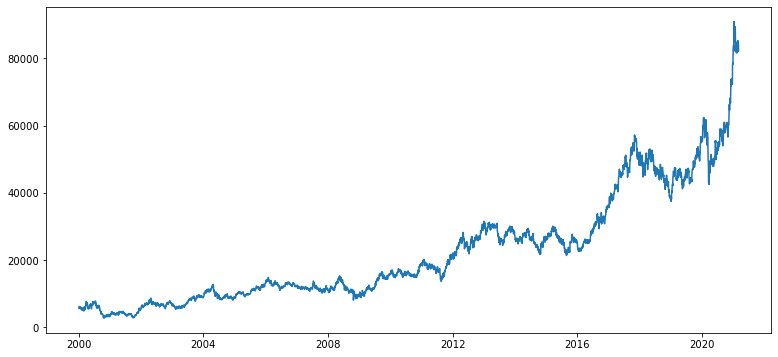

In [62]:
# 시각화로 Stationary 여부 확인.
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6  

# 시계열 데이터를 차트로 표현.
plt.plot(ts)

In [63]:
# 시계열에서 결측치가 있는 부분만 Series로 출력.
ts[ts.isna()]

# 결측치가 있다면 보간하기. --> 보간 기준은 time. 
ts=ts.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인.
print(ts[ts.isna()])

Series([], Name: Close, dtype: float64)


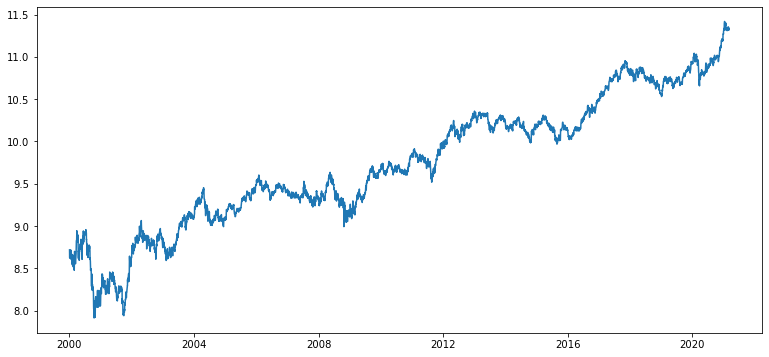

In [64]:
# 로그 변환.
ts_log = np.log(ts)

# 그래프 재확인.
plt.plot(ts_log)

# Step 4. 시계열 Stationary 분석

In [65]:
from statsmodels.tsa.stattools import adfuller

# 일정 시간 내 구간 통계치(Rolling Statistics)를 시각화해 보는 함수.
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열.
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열.

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)    

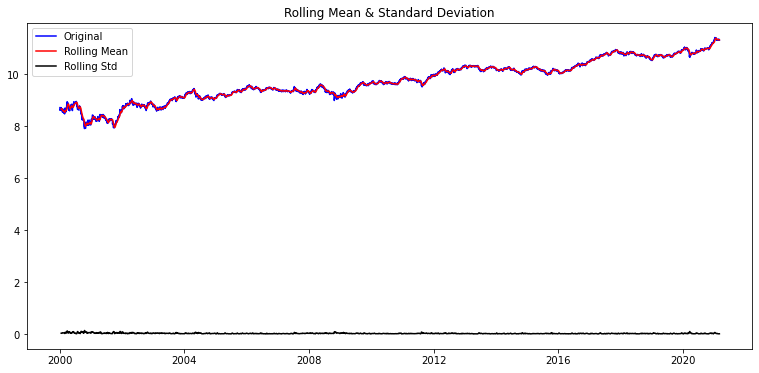

Results of Dickey-Fuller Test:
Test Statistic                   -0.322243
p-value                           0.922294
#Lags Used                        4.000000
Number of Observations Used    5316.000000
Critical Value (1%)              -3.431581
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567059
dtype: float64


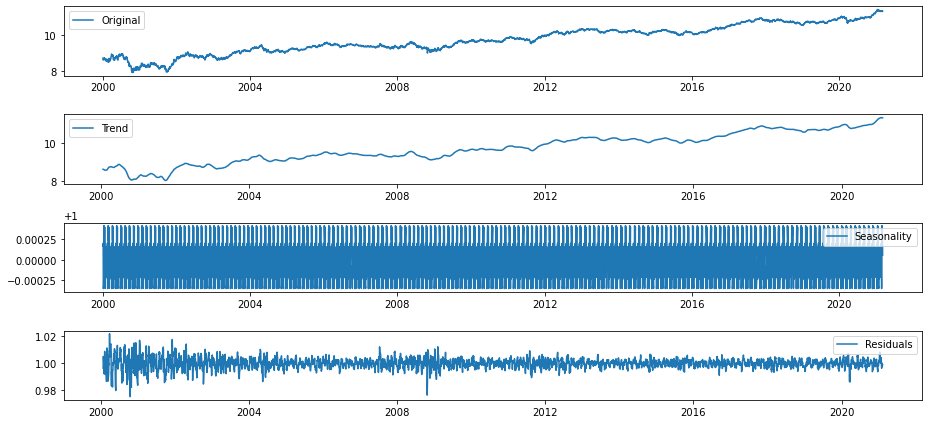

In [66]:
# 정성적 그래프 분석.
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test.
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition).
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

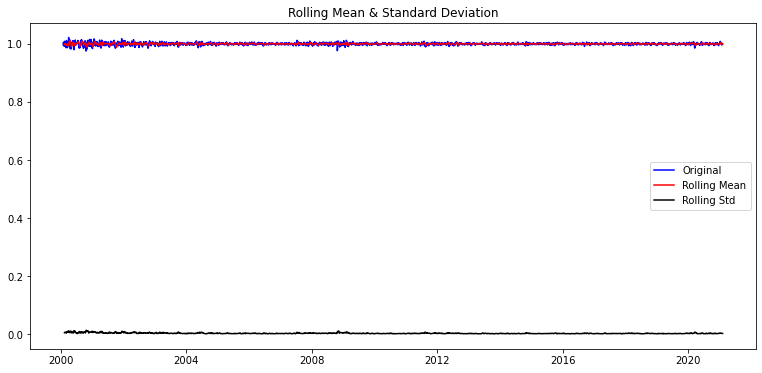

Results of Dickey-Fuller Test:
Test Statistic                -1.760787e+01
p-value                        3.892667e-30
#Lags Used                     3.300000e+01
Number of Observations Used    5.257000e+03
Critical Value (1%)           -3.431595e+00
Critical Value (5%)           -2.862090e+00
Critical Value (10%)          -2.567063e+00
dtype: float64


In [67]:
# Residual의 Stationality 여부 확인.
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

*****

# Step 5. 훈련, 시험 데이터셋 생성

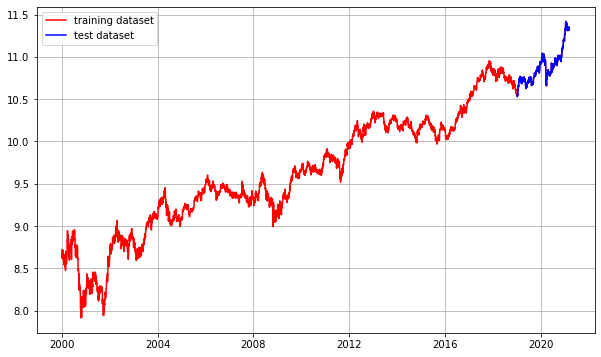

In [68]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택.
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [69]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2000-01-04    8.717682
2000-01-05    8.626944
Name: Close, dtype: float64
(4788,)
(533,)


*****

# Step 6. 적정 ARIMA 모수 찾기

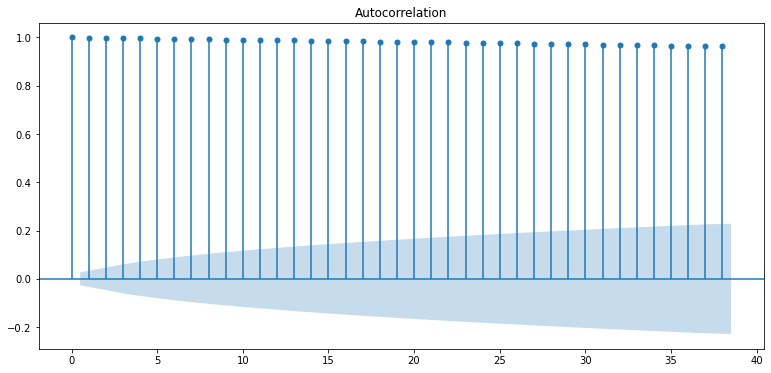

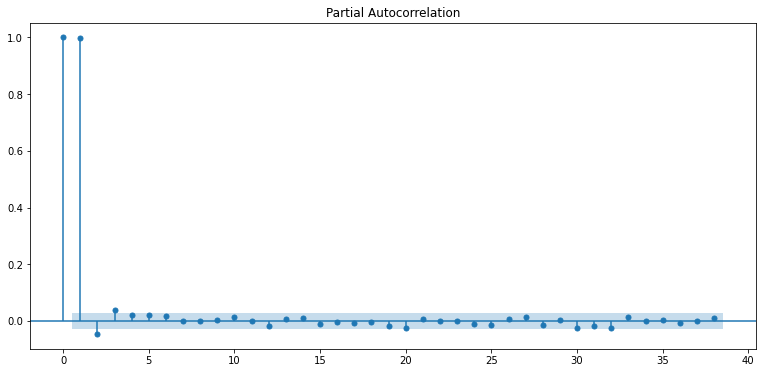

In [70]:
# ACF, PACF 그려보기 -> p,q 구하기.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기.
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기.
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -40.116347
p-value                           0.000000
#Lags Used                        3.000000
Number of Observations Used    5316.000000
Critical Value (1%)              -3.431581
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567059
dtype: float64


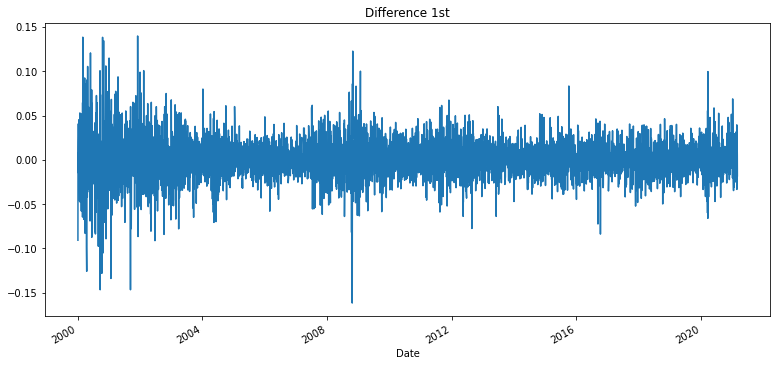

In [71]:
# 차분 안정성 확인 -> d 구하기.
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)


# 혹시 필요한 경우 2차 차분 구하기
# diff_2 = diff_1.diff(periods=1).iloc[1:]
# diff_2.plot(title='Difference 2nd')
 
# augmented_dickey_fuller_test(diff_2)

*****

# Step 7. ARIMA 모델 훈련과 추론

In [72]:
from statsmodels.tsa.arima_model import ARIMA

# 모델 설계. # p, d, q 순.
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4787
Model:                 ARIMA(1, 1, 0)   Log Likelihood               11282.237
Method:                       css-mle   S.D. of innovations              0.023
Date:                Thu, 04 Mar 2021   AIC                         -22558.473
Time:                        15:39:07   BIC                         -22539.052
Sample:                             1   HQIC                        -22551.651
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0004      0.000      1.093      0.275      -0.000       0.001
ar.L1.D.Close     0.0436      0.014      3.017      0.003       0.015       0.072
                                    Root

/home/aiffel-dj20/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj20/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

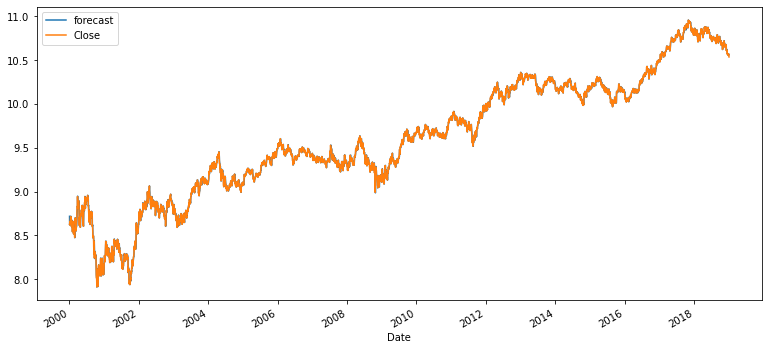

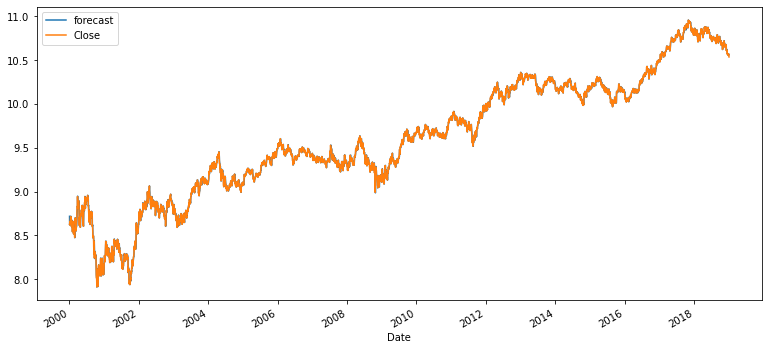

In [73]:
# 훈련 데이터에 ARIMA 모델이 잘 맞는지 시각적으로 확인.
fitted_m.plot_predict()

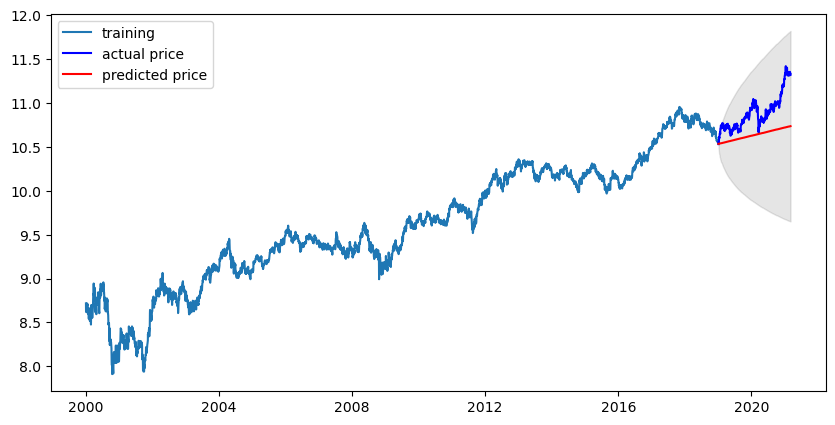

In [74]:
# Forecast(): 테스트 구간의 데이터 예측.
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf.

# Make as pandas series.
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드.
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드.

# Plot.
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [75]:
# 최종 모델의 오차율 계산.
# 로그 변환된 시계열을 사용해 왔던 것을 모두 지수 변환하여 원본의 스케일로 계산해야 타당.
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

# MAPE(평균절대비오차): 모델 신뢰성 검증법으로 크기가 작은 모델을 좋은 모델로 평가.
mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  257649304.0576353
MAE:  12871.946905880799
RMSE:  16051.458004107768
MAPE: 21.50%


*****

# Step 8. 다른 주식 종목 예측해보기

## 국내주식
- **집안에 주식 열풍이 불고 있어 가족들이 가진 보유 주식을 기준으로 선정함.**

### 진원생명과학 011000

In [76]:
# 경로지정 후 불러오기.
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/Geneone.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


Date         Open         High          Low        Close  \
0  2000-02-04  3387.057861  3387.057861  3387.057861  3387.057861   
1  2000-02-07  3387.057861  3387.057861  3387.057861  3387.057861   
2  2000-02-08  3387.057861  3387.057861  3387.057861  3387.057861   
3  2000-02-09  3387.057861  3387.057861  3387.057861  3387.057861   
4  2000-02-10  3387.057861  3387.057861  3387.057861  3387.057861   

     Adj Close  Volume  
0  3387.057861     0.0  
1  3387.057861     0.0  
2  3387.057861     0.0  
3  3387.057861     0.0  
4  3387.057861     0.0

In [77]:
# Date를 index_col로 지정. --> 시계열 데이터 생성. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True) # index 동일.
print(type(df))

ts = df['Close'] # index 동일.
print(type(ts))
ts.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Date
2000-02-04    3387.057861
2000-02-07    3387.057861
2000-02-08    3387.057861
2000-02-09    3387.057861
2000-02-10    3387.057861
Name: Close, dtype: float64

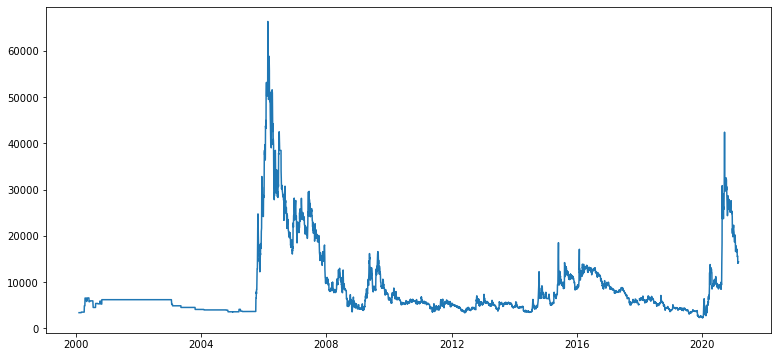

In [78]:
# 시각화로 Stationary 여부 확인.
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6  

# 시계열 데이터를 차트로 표현.
plt.plot(ts)

Series([], Name: Close, dtype: float64)


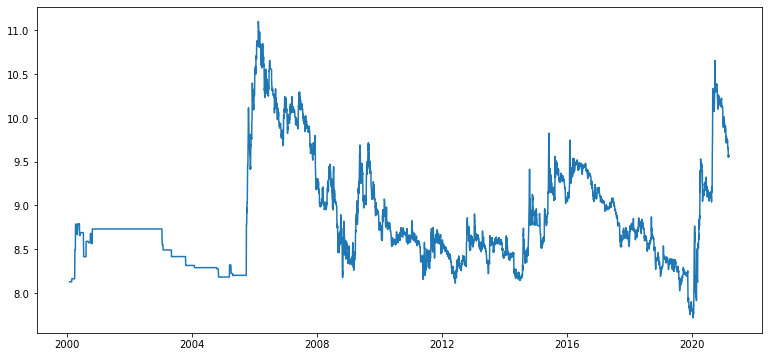

In [79]:
# 시계열에서 결측치가 있는 부분만 Series로 출력.
ts[ts.isna()]

# 결측치가 있다면 보간하기. --> 보간 기준은 time. 
ts=ts.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인.
print(ts[ts.isna()])

# 로그 변환.
ts_log = np.log(ts)

# 그래프 재확인.
plt.plot(ts_log)

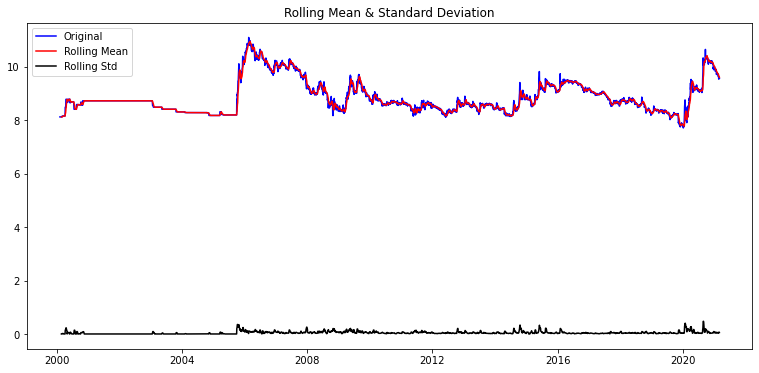

Results of Dickey-Fuller Test:
Test Statistic                   -2.855535
p-value                           0.050768
#Lags Used                       27.000000
Number of Observations Used    5270.000000
Critical Value (1%)              -3.431591
Critical Value (5%)              -2.862089
Critical Value (10%)             -2.567062
dtype: float64


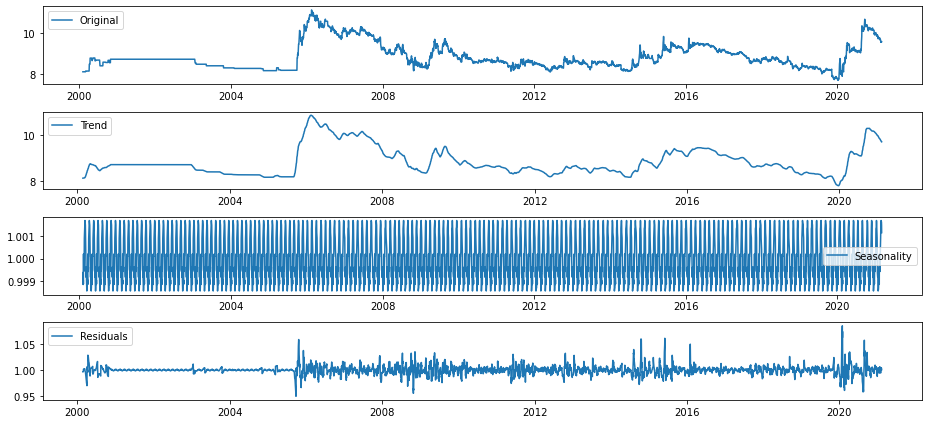

In [80]:
# 정성적 그래프 분석.
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test.
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition).
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

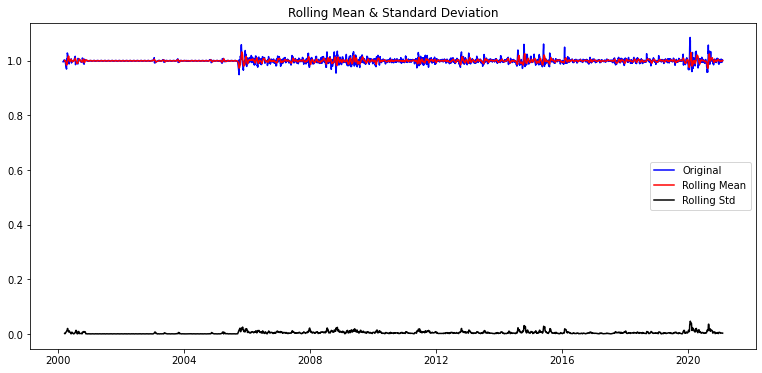

Results of Dickey-Fuller Test:
Test Statistic                -1.868423e+01
p-value                        2.041068e-30
#Lags Used                     3.300000e+01
Number of Observations Used    5.234000e+03
Critical Value (1%)           -3.431600e+00
Critical Value (5%)           -2.862092e+00
Critical Value (10%)          -2.567064e+00
dtype: float64


In [81]:
# Residual의 Stationality 여부 확인.
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

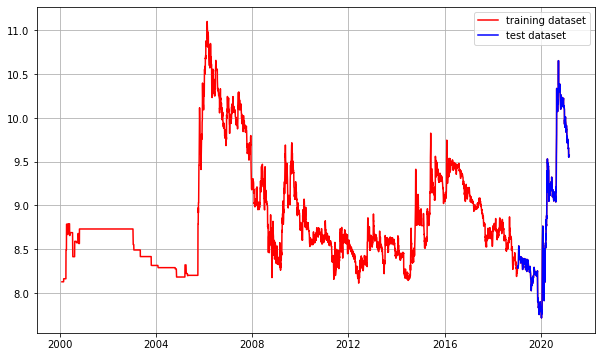

In [82]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택.
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

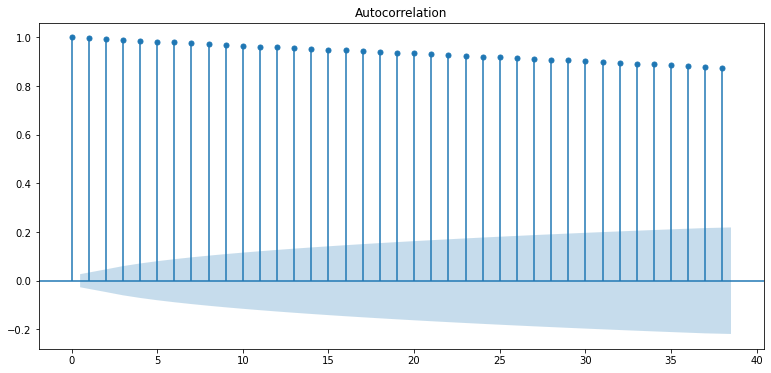

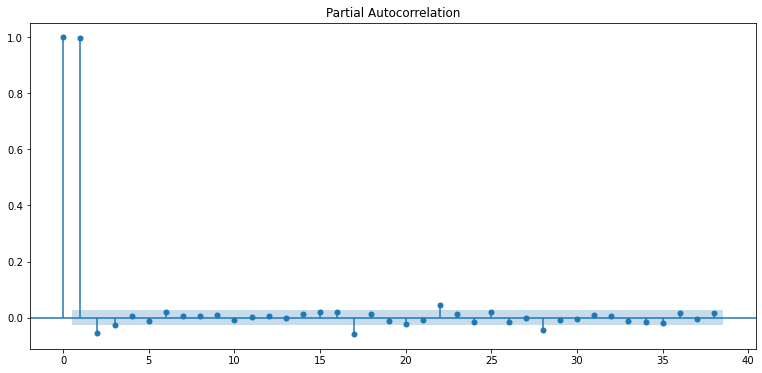

In [84]:
# ACF, PACF 그려보기 -> p,q 구하기.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기.
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기.
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.377723e+01
p-value                        9.440632e-26
#Lags Used                     2.600000e+01
Number of Observations Used    5.270000e+03
Critical Value (1%)           -3.431591e+00
Critical Value (5%)           -2.862089e+00
Critical Value (10%)          -2.567062e+00
dtype: float64


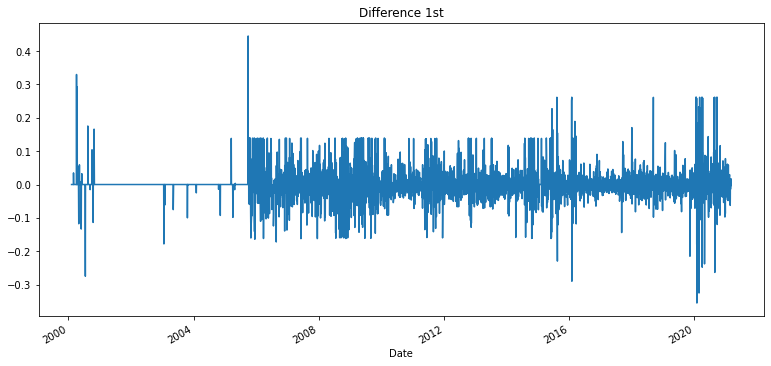

In [86]:
# 차분 안정성 확인 -> d 구하기.
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

In [87]:
from statsmodels.tsa.arima_model import ARIMA

# 모델 설계.
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4767
Model:                 ARIMA(1, 1, 0)   Log Likelihood                8341.589
Method:                       css-mle   S.D. of innovations              0.042
Date:                Thu, 04 Mar 2021   AIC                         -16677.178
Time:                        15:42:30   BIC                         -16657.770
Sample:                             1   HQIC                        -16670.359
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.392e-05      0.001      0.053      0.958      -0.001       0.001
ar.L1.D.Close     0.0464      0.014      3.205      0.001       0.018       0.075
                                    Root

/home/aiffel-dj20/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj20/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

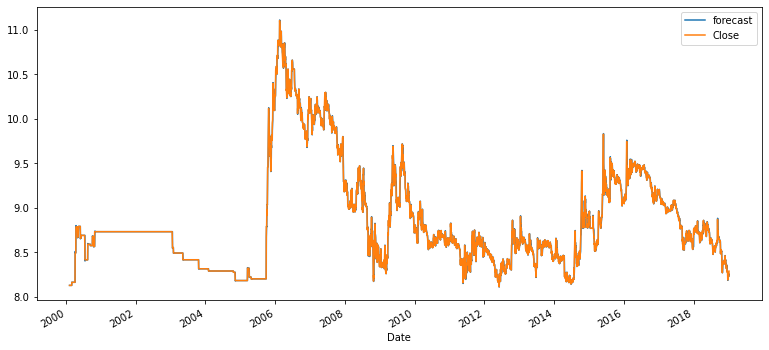

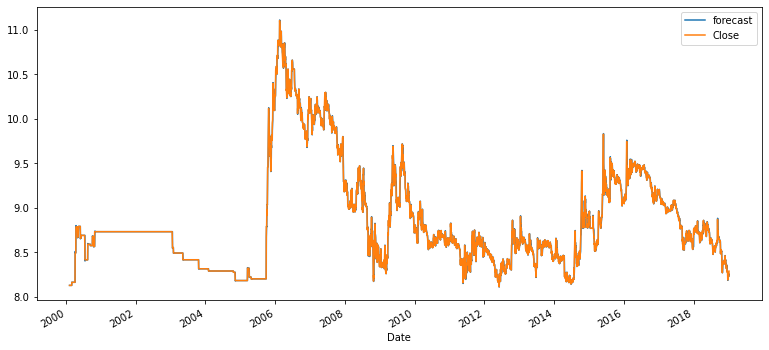

In [88]:
# 훈련 데이터에 ARIMA 모델이 잘 맞는지 시각적으로 확인.
fitted_m.plot_predict()

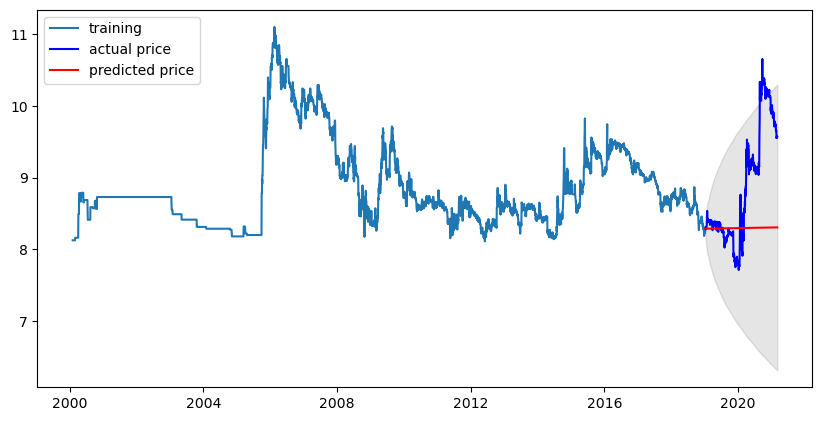

In [89]:
# Forecast(): 테스트 구간의 데이터 예측.
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf.

# Make as pandas series.
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드.
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드.

# Plot.
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [90]:
# 최종 모델의 오차율 계산.
# 로그 변환된 시계열을 사용해 왔던 것을 모두 지수 변환하여 원본의 스케일로 계산해야 타당.
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  114807923.01731303
MAE:  6413.839287633589
RMSE:  10714.845916638888
MAPE: 41.63%


### 한라 014790

In [91]:
# 경로지정 후 불러오기.
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/Halla_Co.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


Date         Open         High          Low        Close  \
0  2000-01-04  4020.603760  4619.901367  3800.608398  4293.701172   
1  2000-01-05  3884.054932  4172.324707  3884.054932  3982.673584   
2  2000-01-06  4028.189697  4028.189697  3641.301514  3641.301514   
3  2000-01-07  3679.231689  3793.022461  3527.510742  3527.510742   
4  2000-01-10  3489.580566  3679.231689  3459.236328  3474.408447   

     Adj Close    Volume  
0  1849.875122  183231.0  
1  1715.873779   94120.0  
2  1568.799194   61824.0  
3  1519.773804  111388.0  
4  1496.895508  114420.0

In [92]:
# Date를 index_col로 지정. --> 시계열 데이터 생성. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True) # index 동일.
print(type(df))

ts = df['Close'] # index 동일.
print(type(ts))
ts.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Date
2000-01-04    4293.701172
2000-01-05    3982.673584
2000-01-06    3641.301514
2000-01-07    3527.510742
2000-01-10    3474.408447
Name: Close, dtype: float64

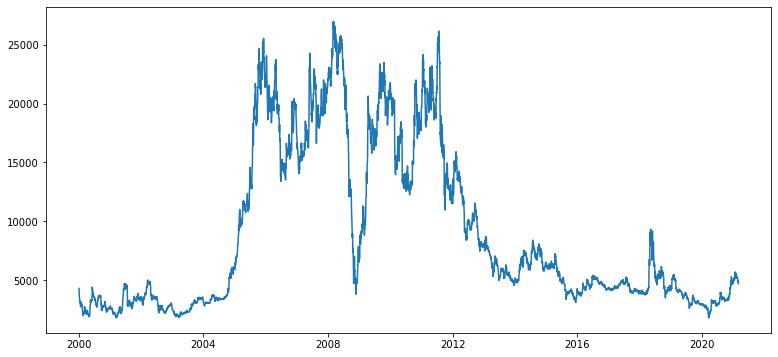

In [93]:
# 시각화로 Stationary 여부 확인.
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6  

# 시계열 데이터를 차트로 표현.
plt.plot(ts)

Series([], Name: Close, dtype: float64)


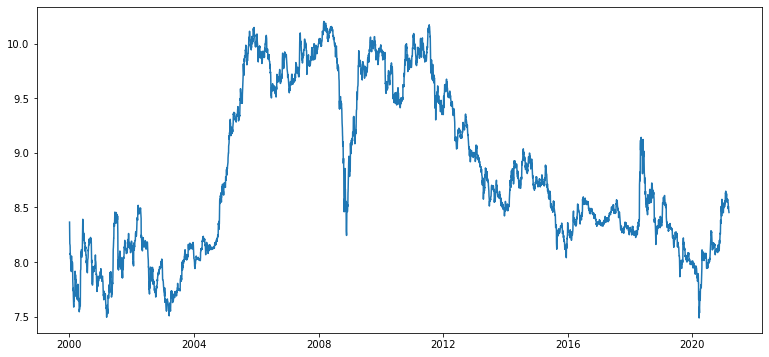

In [95]:
# 시계열에서 결측치가 있는 부분만 Series로 출력.
ts[ts.isna()]

# 결측치가 있다면 보간하기. --> 보간 기준은 time. 
ts=ts.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인.
print(ts[ts.isna()])

# 로그 변환.
ts_log = np.log(ts)

# 그래프 재확인.
plt.plot(ts_log)

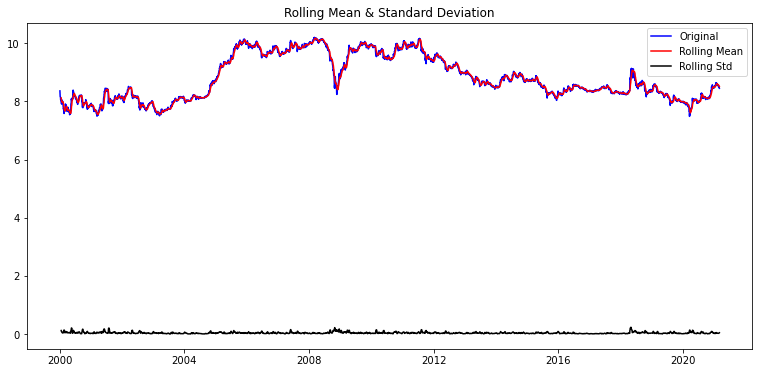

Results of Dickey-Fuller Test:
Test Statistic                   -1.893536
p-value                           0.335108
#Lags Used                        6.000000
Number of Observations Used    5314.000000
Critical Value (1%)              -3.431581
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567060
dtype: float64


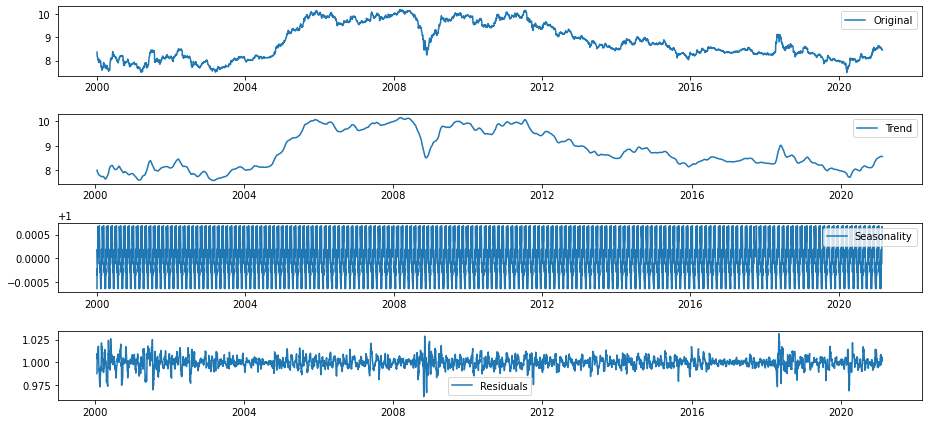

In [96]:
# 정성적 그래프 분석.
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test.
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition).
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

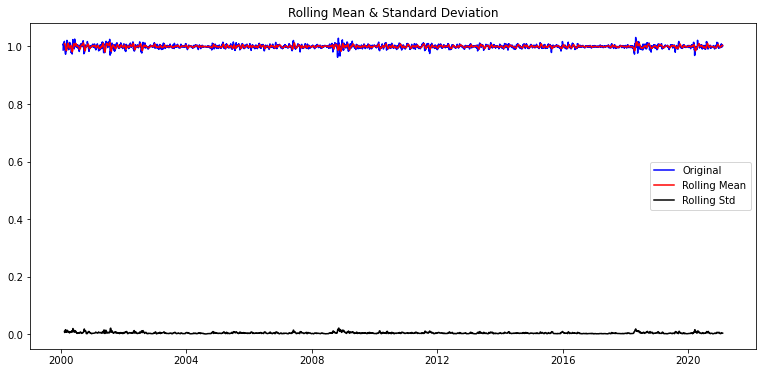

Results of Dickey-Fuller Test:
Test Statistic                -1.774034e+01
p-value                        3.404360e-30
#Lags Used                     3.300000e+01
Number of Observations Used    5.257000e+03
Critical Value (1%)           -3.431595e+00
Critical Value (5%)           -2.862090e+00
Critical Value (10%)          -2.567063e+00
dtype: float64


In [97]:
# Residual의 Stationality 여부 확인.
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

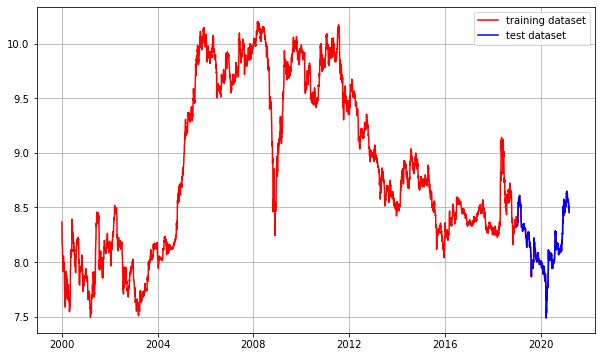

In [98]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택.
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

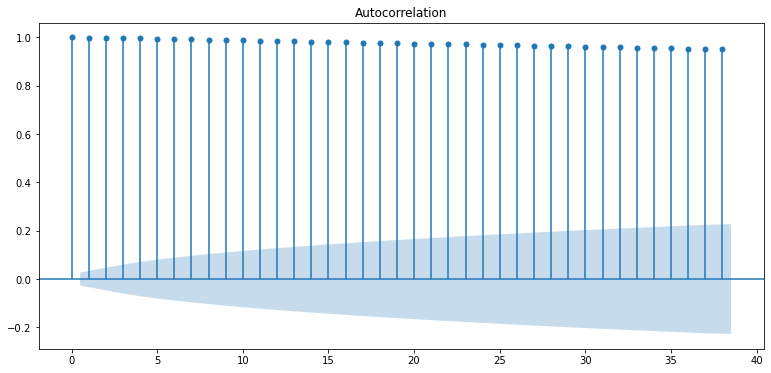

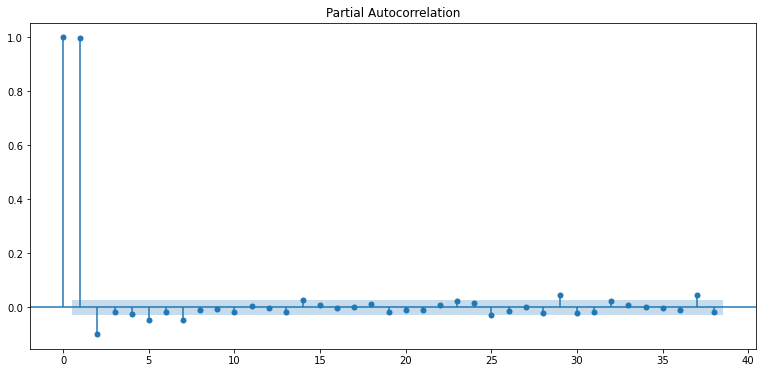

In [100]:
# ACF, PACF 그려보기 -> p,q 구하기.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기.
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기.
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -27.011776
p-value                           0.000000
#Lags Used                        5.000000
Number of Observations Used    5314.000000
Critical Value (1%)              -3.431581
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567060
dtype: float64


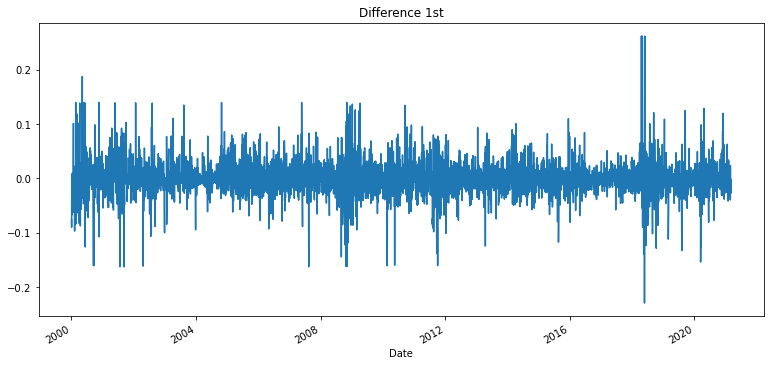

In [101]:
# 차분 안정성 확인 -> d 구하기.
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

In [102]:
from statsmodels.tsa.arima_model import ARIMA

# 모델 설계.
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4787
Model:                 ARIMA(1, 1, 0)   Log Likelihood                9844.090
Method:                       css-mle   S.D. of innovations              0.031
Date:                Thu, 04 Mar 2021   AIC                         -19682.180
Time:                        15:47:05   BIC                         -19662.759
Sample:                             1   HQIC                        -19675.359
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.959e-06      0.000     -0.016      0.987      -0.001       0.001
ar.L1.D.Close     0.0756      0.014      5.242      0.000       0.047       0.104
                                    Root

/home/aiffel-dj20/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj20/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

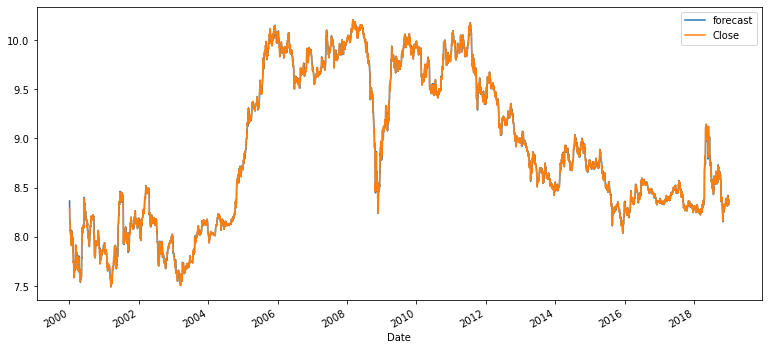

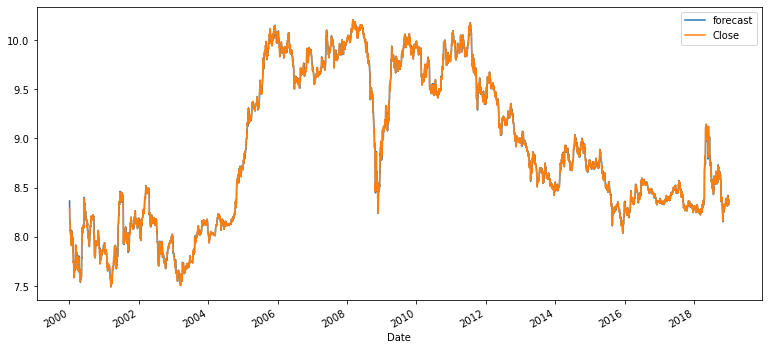

In [103]:
# 훈련 데이터에 ARIMA 모델이 잘 맞는지 시각적으로 확인.
fitted_m.plot_predict()

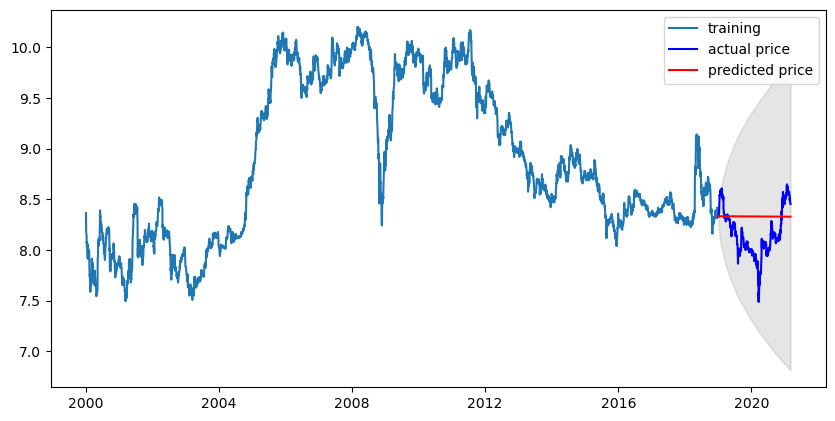

In [104]:
# Forecast(): 테스트 구간의 데이터 예측.
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf.

# Make as pandas series.
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드.
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드.

# Plot.
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [105]:
# 최종 모델의 오차율 계산.
# 로그 변환된 시계열을 사용해 왔던 것을 모두 지수 변환하여 원본의 스케일로 계산해야 타당.
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1011503.1236145693
MAE:  893.6934626709045
RMSE:  1005.7351160293496
MAPE: 28.14%


### 코오롱 글로벌 003070

In [106]:
# 경로지정 후 불러오기.
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/Kolon_Global.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


Date     Open     High      Low    Close     Adj Close    Volume
0  2000-01-04  21500.0  25250.0  21100.0  23100.0  15245.867188  160700.0
1  2000-01-05  22950.0  22950.0  20750.0  21500.0  14189.875977   81280.0
2  2000-01-06  22025.0  22025.0  20000.0  20100.0  13265.882813   36100.0
3  2000-01-07  20250.0  20750.0  19750.0  20150.0  13298.882813   49880.0
4  2000-01-10  20500.0  20700.0  20100.0  20300.0  13397.881836   57320.0

In [107]:
# Date를 index_col로 지정. --> 시계열 데이터 생성. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True) # index 동일.
print(type(df))

ts = df['Close'] # index 동일.
print(type(ts))
ts.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Date
2000-01-04    23100.0
2000-01-05    21500.0
2000-01-06    20100.0
2000-01-07    20150.0
2000-01-10    20300.0
Name: Close, dtype: float64

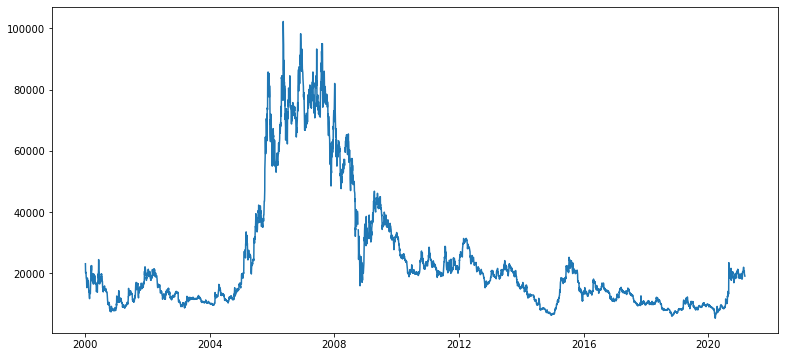

In [108]:
# 시각화로 Stationary 여부 확인.
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6  

# 시계열 데이터를 차트로 표현.
plt.plot(ts)

Series([], Name: Close, dtype: float64)


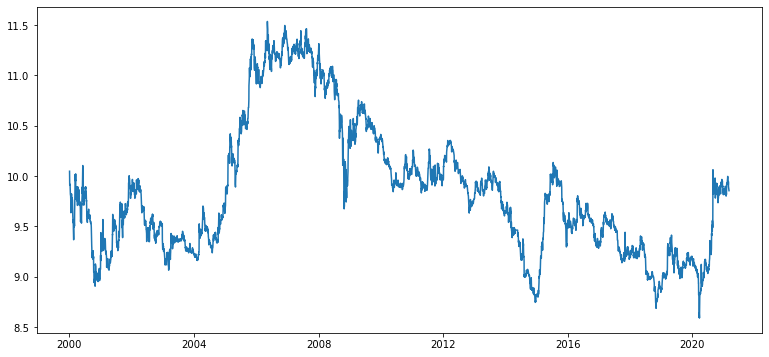

In [109]:
# 시계열에서 결측치가 있는 부분만 Series로 출력.
ts[ts.isna()]

# 결측치가 있다면 보간하기. --> 보간 기준은 time. 
ts=ts.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인.
print(ts[ts.isna()])

# 로그 변환.
ts_log = np.log(ts)

# 그래프 재확인.
plt.plot(ts_log)

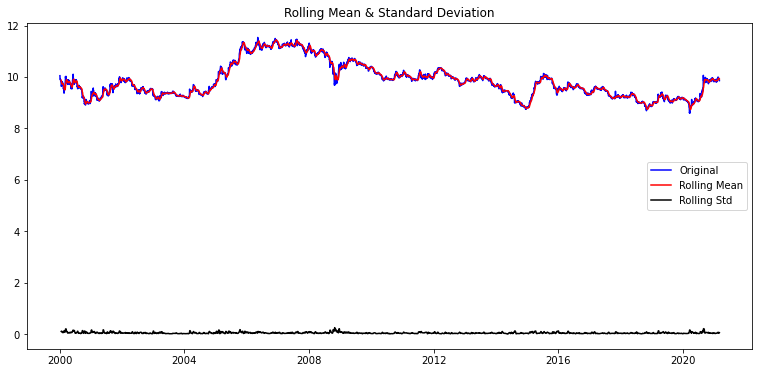

Results of Dickey-Fuller Test:
Test Statistic                   -1.884394
p-value                           0.339438
#Lags Used                        8.000000
Number of Observations Used    5312.000000
Critical Value (1%)              -3.431582
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567060
dtype: float64


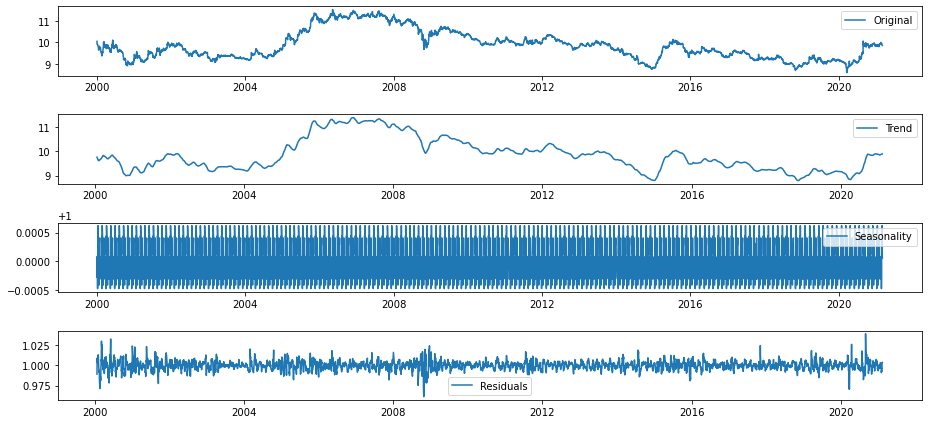

In [110]:
# 정성적 그래프 분석.
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test.
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition).
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

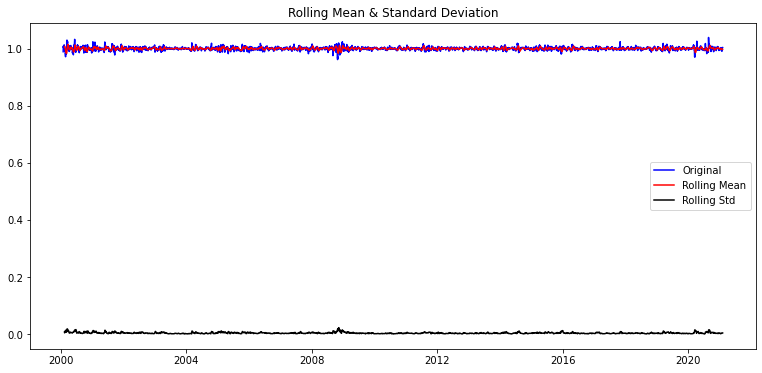

Results of Dickey-Fuller Test:
Test Statistic                -1.789732e+01
p-value                        2.962300e-30
#Lags Used                     3.100000e+01
Number of Observations Used    5.259000e+03
Critical Value (1%)           -3.431594e+00
Critical Value (5%)           -2.862090e+00
Critical Value (10%)          -2.567063e+00
dtype: float64


In [111]:
# Residual의 Stationality 여부 확인.
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

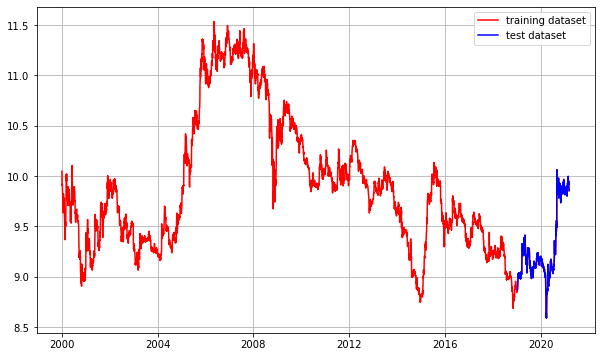

In [112]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택.
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

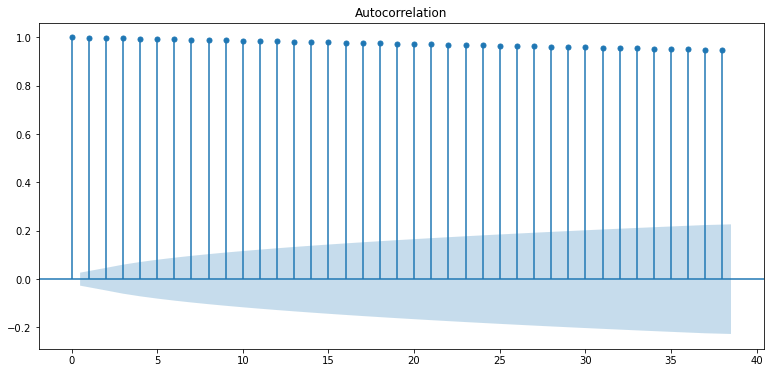

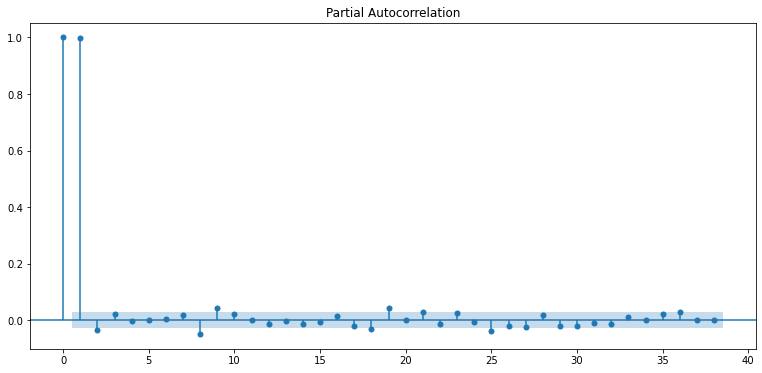

In [113]:
# ACF, PACF 그려보기 -> p,q 구하기.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기.
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기.
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -25.104806
p-value                           0.000000
#Lags Used                        8.000000
Number of Observations Used    5311.000000
Critical Value (1%)              -3.431582
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567060
dtype: float64


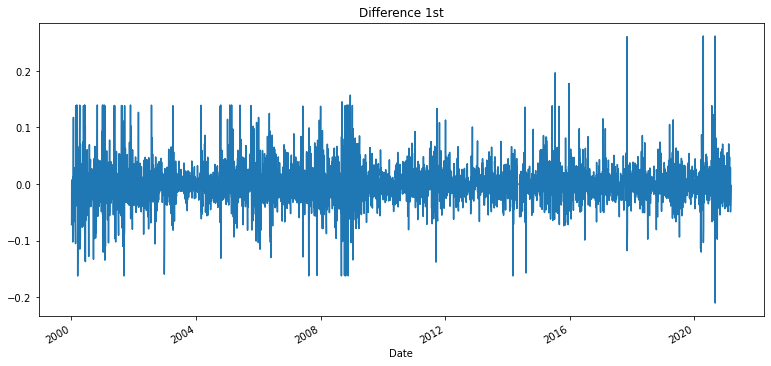

In [114]:
# 차분 안정성 확인 -> d 구하기.
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

In [115]:
from statsmodels.tsa.arima_model import ARIMA

# 모델 설계.
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4787
Model:                 ARIMA(1, 1, 0)   Log Likelihood                9418.665
Method:                       css-mle   S.D. of innovations              0.034
Date:                Thu, 04 Mar 2021   AIC                         -18831.329
Time:                        15:54:51   BIC                         -18811.908
Sample:                             1   HQIC                        -18824.507
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0002      0.001     -0.482      0.630      -0.001       0.001
ar.L1.D.Close     0.0284      0.014      1.966      0.049    8.77e-05       0.057
                                    Root

/home/aiffel-dj20/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj20/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

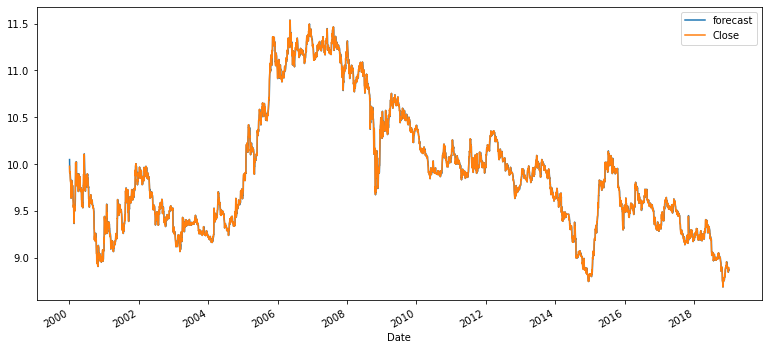

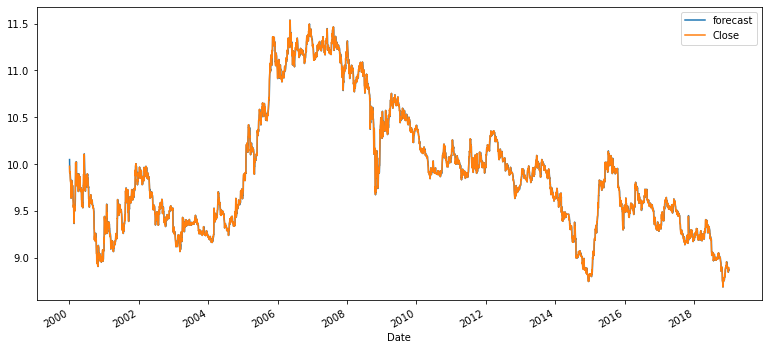

In [116]:
# 훈련 데이터에 ARIMA 모델이 잘 맞는지 시각적으로 확인.
fitted_m.plot_predict()

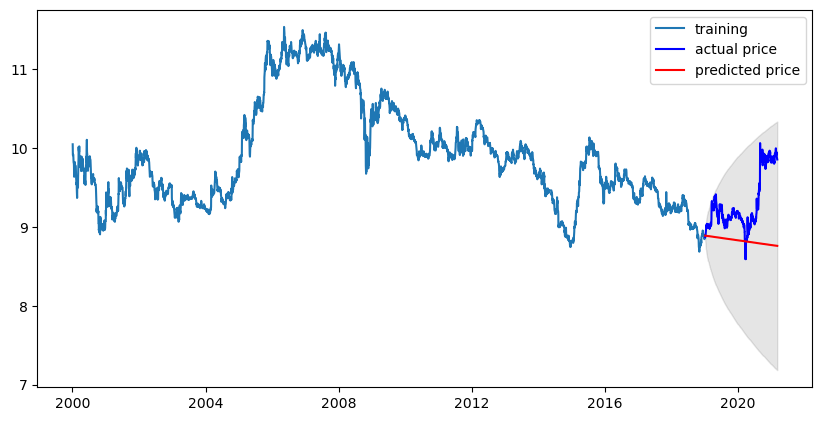

In [117]:
# Forecast(): 테스트 구간의 데이터 예측.
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf.

# Make as pandas series.
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드.
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드.

# Plot.
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [118]:
# 최종 모델의 오차율 계산.
# 로그 변환된 시계열을 사용해 왔던 것을 모두 지수 변환하여 원본의 스케일로 계산해야 타당.
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  45657999.76856671
MAE:  4841.549022423079
RMSE:  6757.070353974917
MAPE: 34.00%


### 강원랜드 035250

In [120]:
# 경로지정 후 불러오기.
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/kangwon_Land.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


Date          Open          High           Low         Close  \
0  2001-10-26  14299.065430  14299.065430  14299.065430  14299.065430   
1  2001-10-29  15981.308594  15981.308594  15700.934570  15981.308594   
2  2001-10-30  15887.850586  16448.597656  15093.458008  15981.308594   
3  2001-10-31  16214.953125  16308.411133  15514.018555  15560.748047   
4  2001-11-01  15560.748047  15700.934570  15000.000000  15093.458008   

     Adj Close      Volume  
0  8244.994141     86670.0  
1  9214.995117   6989240.0  
2  9214.995117  22488190.0  
3  8972.493164   7325220.0  
4  8703.048828   6980680.0

In [121]:
# Date를 index_col로 지정. --> 시계열 데이터 생성. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True) # index 동일.
print(type(df))

ts = df['Close'] # index 동일.
print(type(ts))
ts.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Date
2001-10-26    14299.065430
2001-10-29    15981.308594
2001-10-30    15981.308594
2001-10-31    15560.748047
2001-11-01    15093.458008
Name: Close, dtype: float64

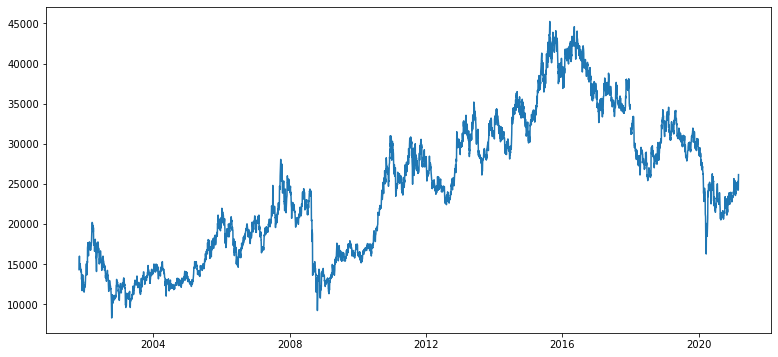

In [122]:
# 시각화로 Stationary 여부 확인.
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6  

# 시계열 데이터를 차트로 표현.
plt.plot(ts)

Series([], Name: Close, dtype: float64)


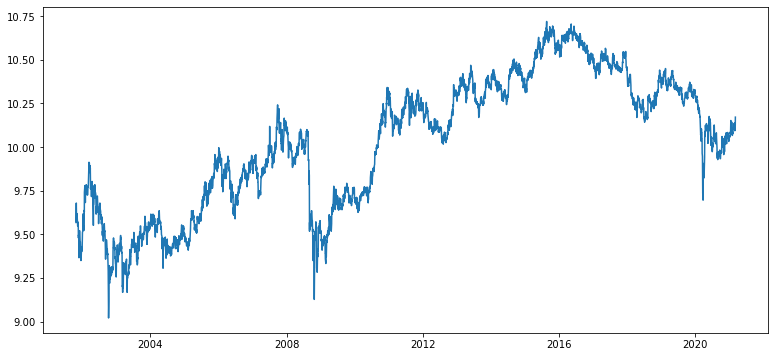

In [123]:
# 시계열에서 결측치가 있는 부분만 Series로 출력.
ts[ts.isna()]

# 결측치가 있다면 보간하기. --> 보간 기준은 time. 
ts=ts.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인.
print(ts[ts.isna()])

# 로그 변환.
ts_log = np.log(ts)

# 그래프 재확인.
plt.plot(ts_log)

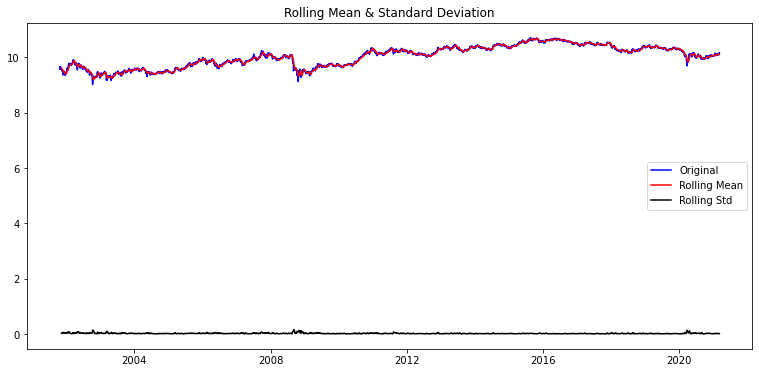

Results of Dickey-Fuller Test:
Test Statistic                   -1.947919
p-value                           0.309865
#Lags Used                        4.000000
Number of Observations Used    4843.000000
Critical Value (1%)              -3.431701
Critical Value (5%)              -2.862137
Critical Value (10%)             -2.567088
dtype: float64


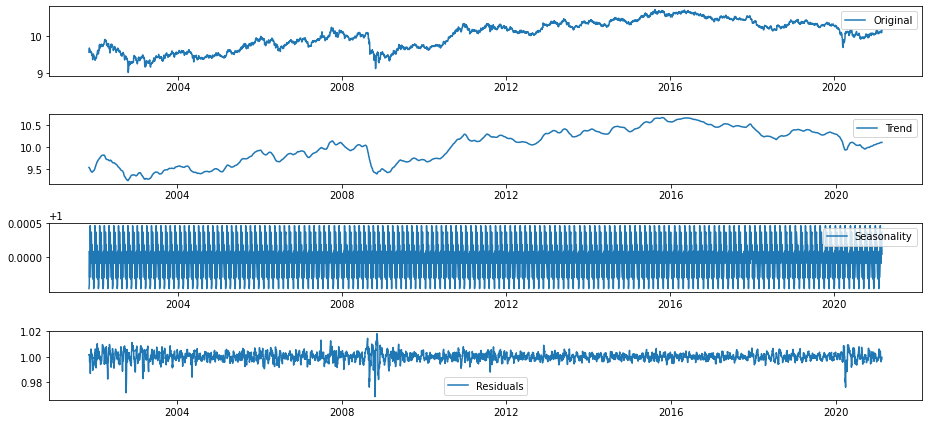

In [124]:
# 정성적 그래프 분석.
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test.
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition).
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

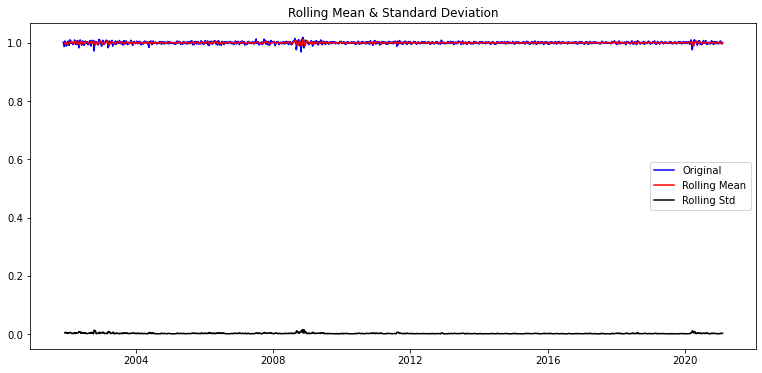

Results of Dickey-Fuller Test:
Test Statistic                -1.803815e+01
p-value                        2.663021e-30
#Lags Used                     2.900000e+01
Number of Observations Used    4.788000e+03
Critical Value (1%)           -3.431717e+00
Critical Value (5%)           -2.862144e+00
Critical Value (10%)          -2.567091e+00
dtype: float64


In [125]:
# Residual의 Stationality 여부 확인.
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

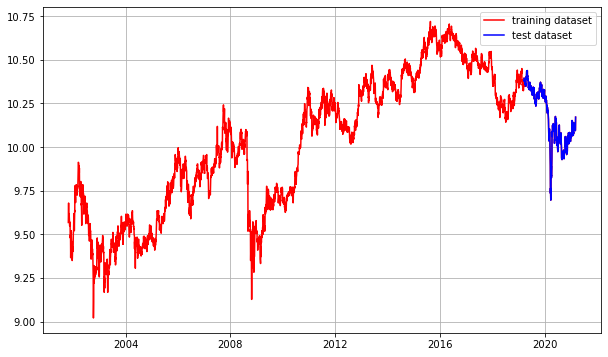

In [126]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택.
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

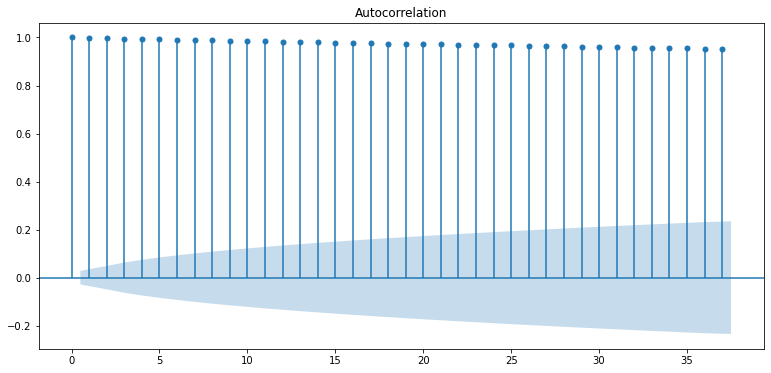

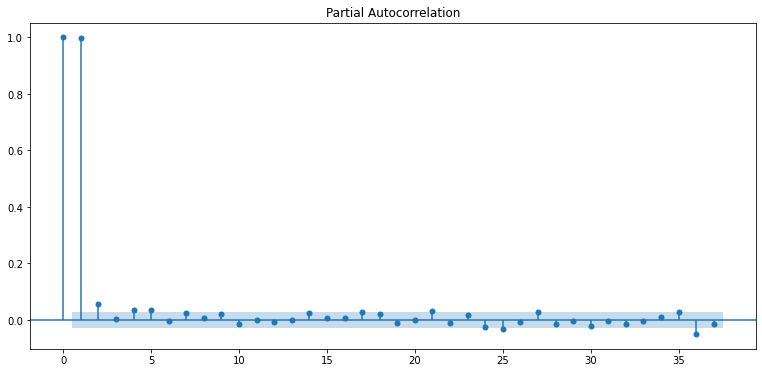

In [127]:
# ACF, PACF 그려보기 -> p,q 구하기.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기.
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기.
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -37.584838
p-value                           0.000000
#Lags Used                        3.000000
Number of Observations Used    4843.000000
Critical Value (1%)              -3.431701
Critical Value (5%)              -2.862137
Critical Value (10%)             -2.567088
dtype: float64


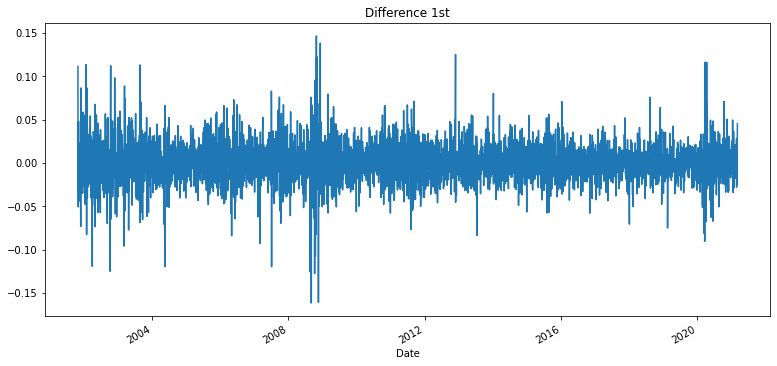

In [128]:
# 차분 안정성 확인 -> d 구하기.
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

In [129]:
from statsmodels.tsa.arima_model import ARIMA

# 모델 설계.
model = ARIMA(train_data, order=(2, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4362
Model:                 ARIMA(2, 1, 0)   Log Likelihood               10349.371
Method:                       css-mle   S.D. of innovations              0.023
Date:                Thu, 04 Mar 2021   AIC                         -20690.743
Time:                        15:58:31   BIC                         -20665.220
Sample:                             1   HQIC                        -20681.735
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.000      0.579      0.562      -0.000       0.001
ar.L1.D.Close    -0.0407      0.015     -2.678      0.007      -0.070      -0.011
ar.L2.D.Close    -0.0082      0.015     

/home/aiffel-dj20/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj20/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

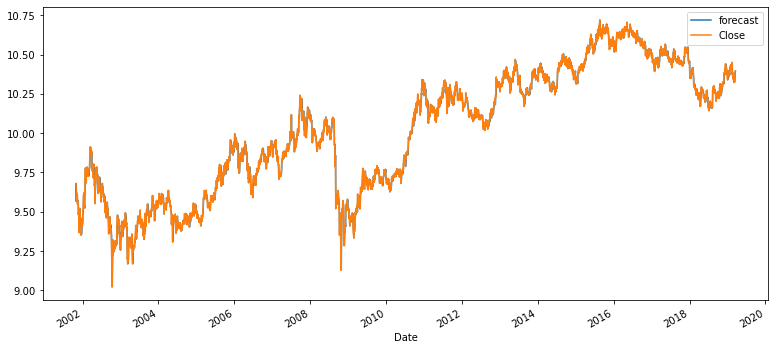

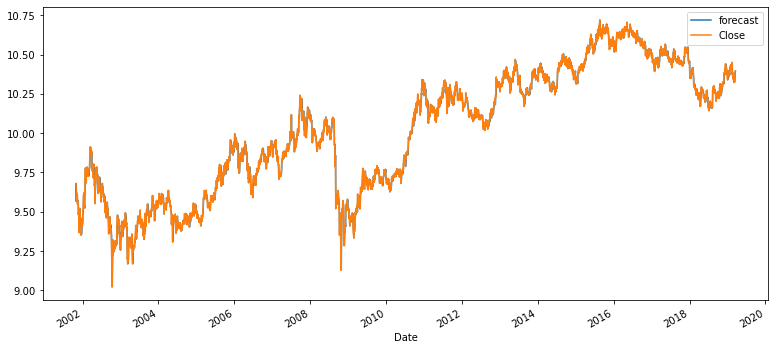

In [130]:
# 훈련 데이터에 ARIMA 모델이 잘 맞는지 시각적으로 확인.
fitted_m.plot_predict()

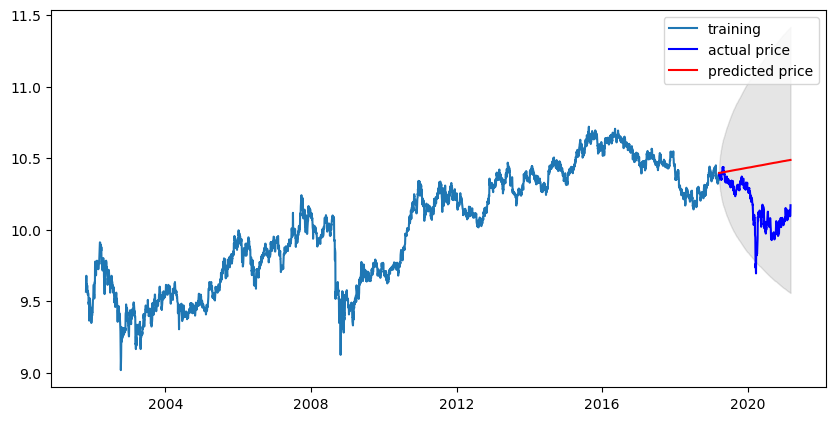

In [131]:
# Forecast(): 테스트 구간의 데이터 예측.
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf.

# Make as pandas series.
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드.
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드.

# Plot.
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [132]:
# 최종 모델의 오차율 계산.
# 로그 변환된 시계열을 사용해 왔던 것을 모두 지수 변환하여 원본의 스케일로 계산해야 타당.
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  84962756.08414815
MAE:  7916.925035799878
RMSE:  9217.524401060631
MAPE: 33.48%


## 해외주식(미국)
- **내가 보유한 미국 주식을 기준을 선정함.**

### 테슬라 TSLA

In [135]:
# 경로지정 후 불러오기.
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/TSLA.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


Date   Open   High    Low  Close  Adj Close    Volume
0  2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500
1  2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500
2  2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000
3  2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000
4  2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500

In [136]:
# Date를 index_col로 지정. --> 시계열 데이터 생성. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True) # index 동일.
print(type(df))

ts = df['Close'] # index 동일.
print(type(ts))
ts.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Date
2010-06-29    4.778
2010-06-30    4.766
2010-07-01    4.392
2010-07-02    3.840
2010-07-06    3.222
Name: Close, dtype: float64

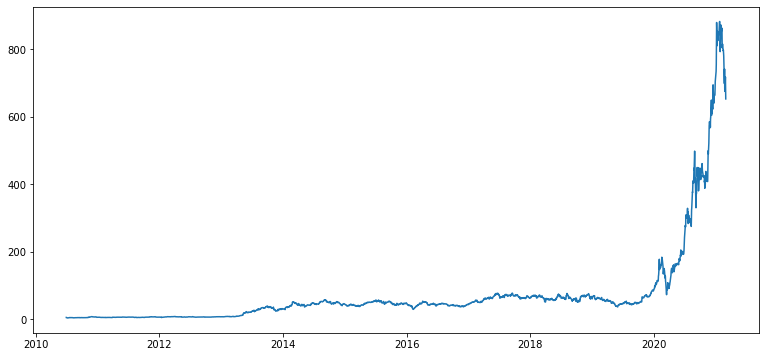

In [137]:
# 시각화로 Stationary 여부 확인.
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6  

# 시계열 데이터를 차트로 표현.
plt.plot(ts)

Series([], Name: Close, dtype: float64)


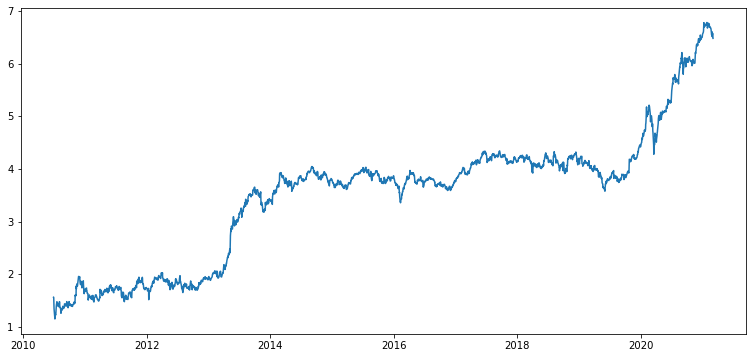

In [138]:
# 시계열에서 결측치가 있는 부분만 Series로 출력.
ts[ts.isna()]

# 결측치가 있다면 보간하기. --> 보간 기준은 time. 
ts=ts.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인.
print(ts[ts.isna()])

# 로그 변환.
ts_log = np.log(ts)

# 그래프 재확인.
plt.plot(ts_log)

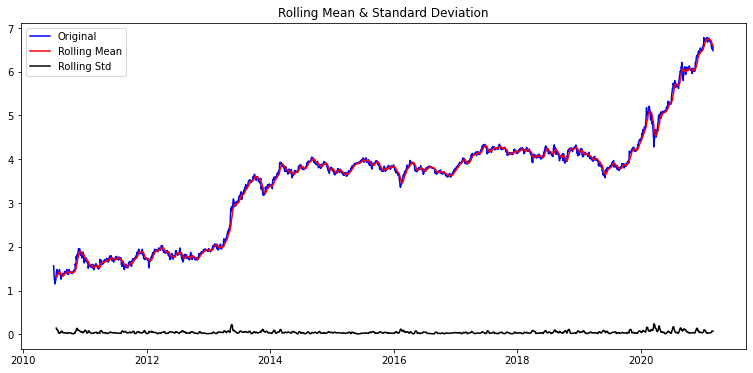

Results of Dickey-Fuller Test:
Test Statistic                    0.394921
p-value                           0.981304
#Lags Used                        0.000000
Number of Observations Used    2687.000000
Critical Value (1%)              -3.432786
Critical Value (5%)              -2.862616
Critical Value (10%)             -2.567343
dtype: float64


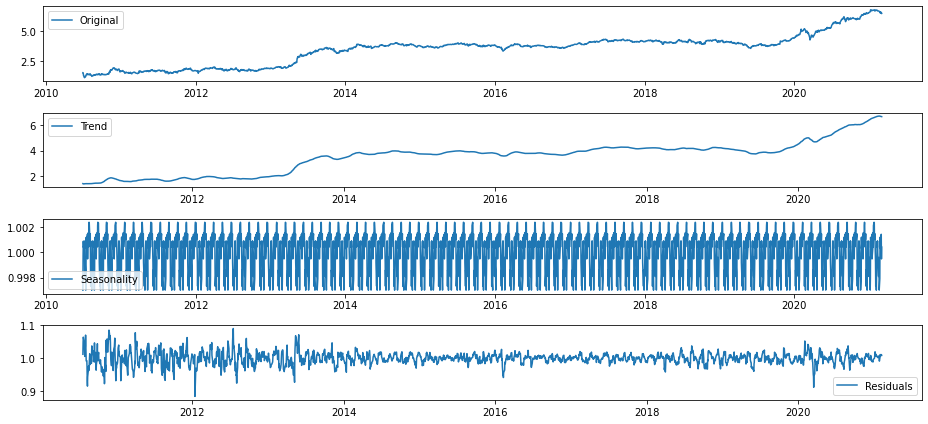

In [139]:
# 정성적 그래프 분석.
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test.
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition).
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

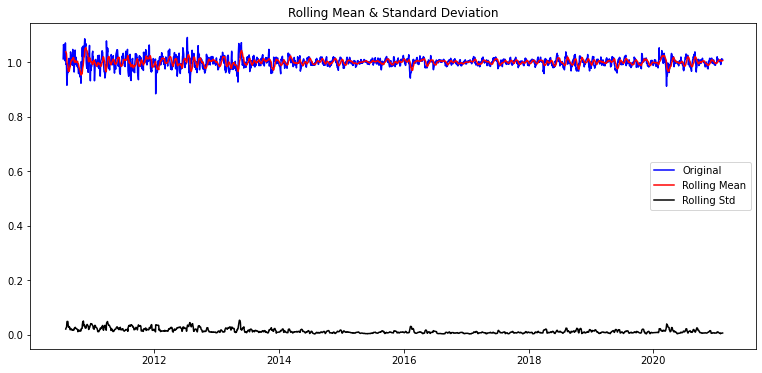

Results of Dickey-Fuller Test:
Test Statistic                -1.260241e+01
p-value                        1.724662e-23
#Lags Used                     2.800000e+01
Number of Observations Used    2.629000e+03
Critical Value (1%)           -3.432840e+00
Critical Value (5%)           -2.862640e+00
Critical Value (10%)          -2.567356e+00
dtype: float64


In [140]:
# Residual의 Stationality 여부 확인.
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

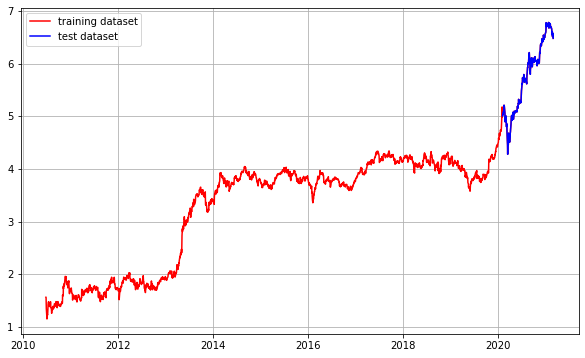

In [141]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택.
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

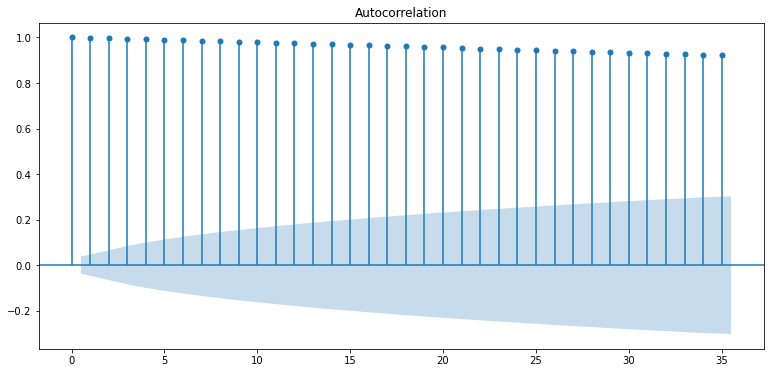

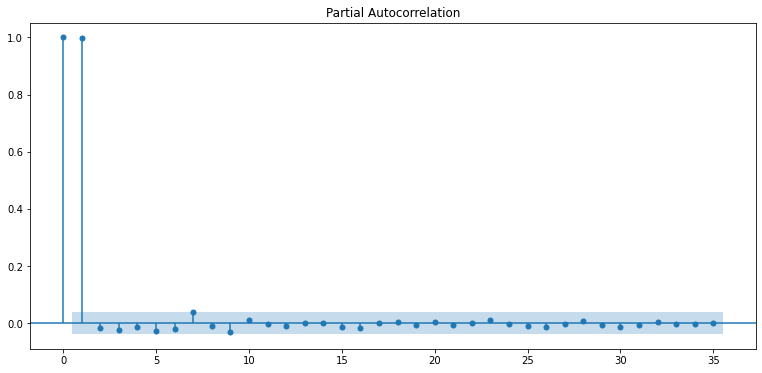

In [142]:
# ACF, PACF 그려보기 -> p,q 구하기.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기.
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기.
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -51.426539
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    2686.000000
Critical Value (1%)              -3.432787
Critical Value (5%)              -2.862617
Critical Value (10%)             -2.567343
dtype: float64


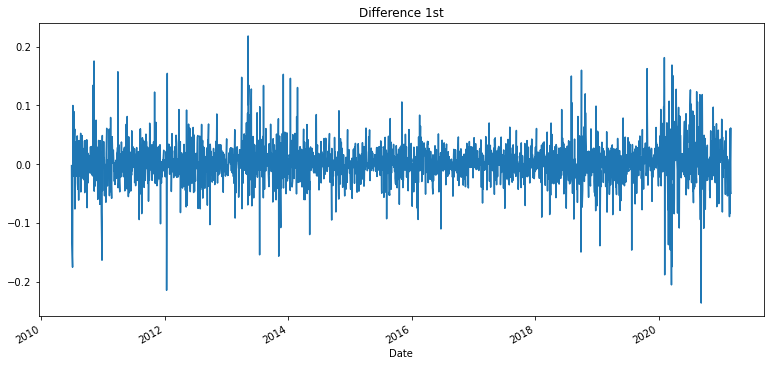

In [143]:
# 차분 안정성 확인 -> d 구하기.
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

In [144]:
from statsmodels.tsa.arima_model import ARIMA

# 모델 설계.
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2418
Model:                 ARIMA(1, 1, 0)   Log Likelihood                4829.928
Method:                       css-mle   S.D. of innovations              0.033
Date:                Thu, 04 Mar 2021   AIC                          -9653.856
Time:                        16:02:12   BIC                          -9636.484
Sample:                             1   HQIC                         -9647.538
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0014      0.001      2.116      0.034       0.000       0.003
ar.L1.D.Close     0.0087      0.020      0.430      0.667      -0.031       0.049
                                    Root

/home/aiffel-dj20/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj20/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

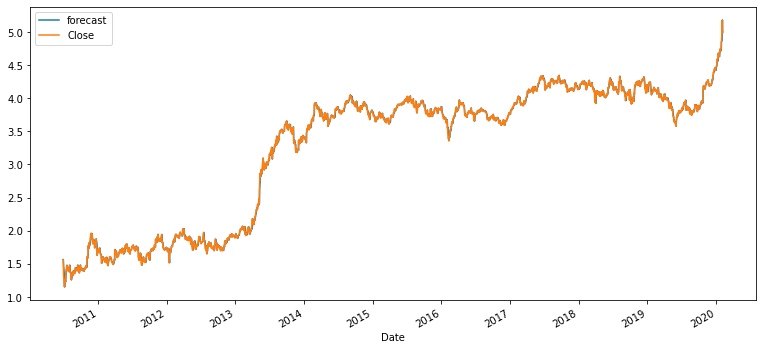

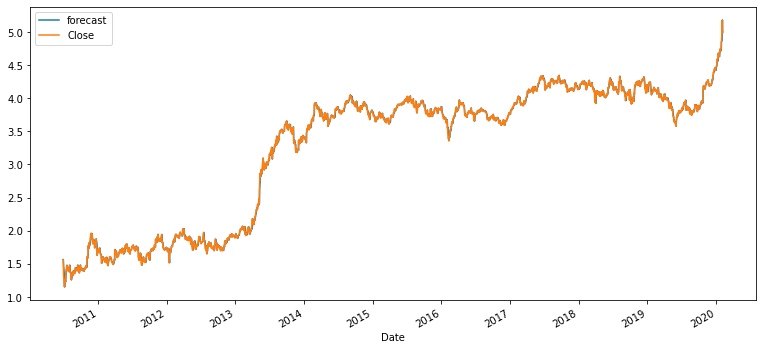

In [145]:
# 훈련 데이터에 ARIMA 모델이 잘 맞는지 시각적으로 확인.
fitted_m.plot_predict()

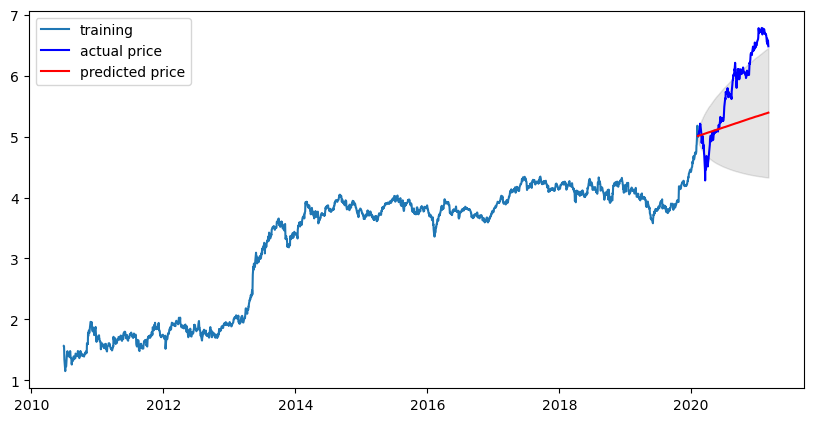

In [146]:
# Forecast(): 테스트 구간의 데이터 예측.
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf.

# Make as pandas series.
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드.
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드.

# Plot.
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [147]:
# 최종 모델의 오차율 계산.
# 로그 변환된 시계열을 사용해 왔던 것을 모두 지수 변환하여 원본의 스케일로 계산해야 타당.
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  87575.41835315441
MAE:  214.28244862792226
RMSE:  295.93144198133865
MAPE: 43.97%


### 스타벅스 SBUX

In [149]:
# 경로지정 후 불러오기.
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/SBUX.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


Date      Open      High       Low     Close  Adj Close     Volume
0  1992-06-26  0.328125  0.347656  0.320313  0.335938   0.279594  224358400
1  1992-06-29  0.339844  0.367188  0.332031  0.359375   0.299100   58732800
2  1992-06-30  0.367188  0.371094  0.343750  0.347656   0.289347   34777600
3  1992-07-01  0.351563  0.359375  0.339844  0.355469   0.295849   18316800
4  1992-07-02  0.359375  0.359375  0.347656  0.355469   0.295849   13996800

In [150]:
# Date를 index_col로 지정. --> 시계열 데이터 생성. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True) # index 동일.
print(type(df))

ts = df['Close'] # index 동일.
print(type(ts))
ts.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Date
1992-06-26    0.335938
1992-06-29    0.359375
1992-06-30    0.347656
1992-07-01    0.355469
1992-07-02    0.355469
Name: Close, dtype: float64

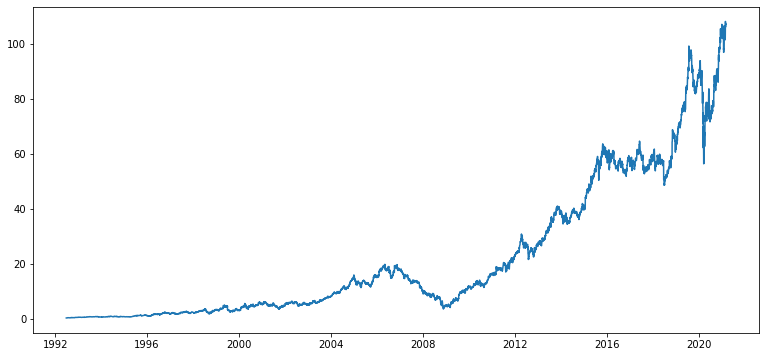

In [154]:
# 시각화로 Stationary 여부 확인.
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6  

# 시계열 데이터를 차트로 표현.
plt.plot(ts)

Series([], Name: Close, dtype: float64)


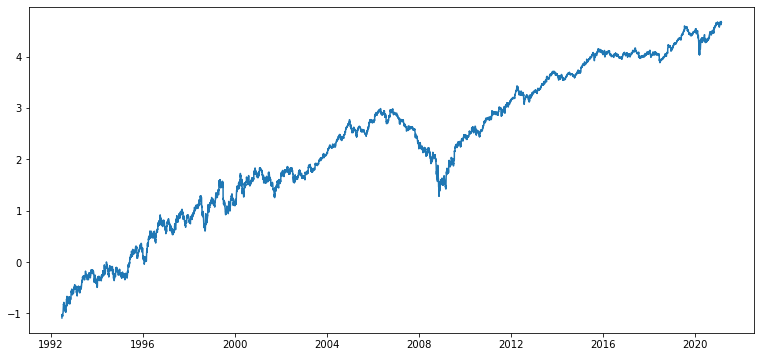

In [157]:
# 시계열에서 결측치가 있는 부분만 Series로 출력.
ts[ts.isna()]

# 결측치가 있다면 보간하기. --> 보간 기준은 time. 
ts=ts.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인.
print(ts[ts.isna()])

# 로그 변환.
ts_log = np.log(ts)

# 그래프 재확인.
plt.plot(ts_log)

In [164]:
# 음수가 있으면 Multiplicative seasonality 에러가 나기 때문에
# 2000년까지 자료를 잘라주기.
print(ts_log['2000-01-01':])
ts_log = ts_log['2000-01-01':]

Date
2000-01-03    1.125589
2000-01-04    1.093390
2000-01-05    1.106395
2000-01-06    1.141931
2000-01-07    1.136931
                ...   
2021-02-25    4.639282
2021-02-26    4.682409
2021-03-01    4.671613
2021-03-02    4.674696
2021-03-03    4.665512
Name: Close, Length: 5325, dtype: float64


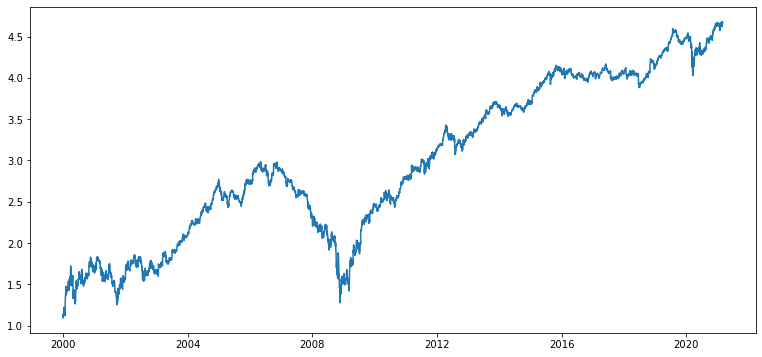

In [165]:
plt.plot(ts_log)

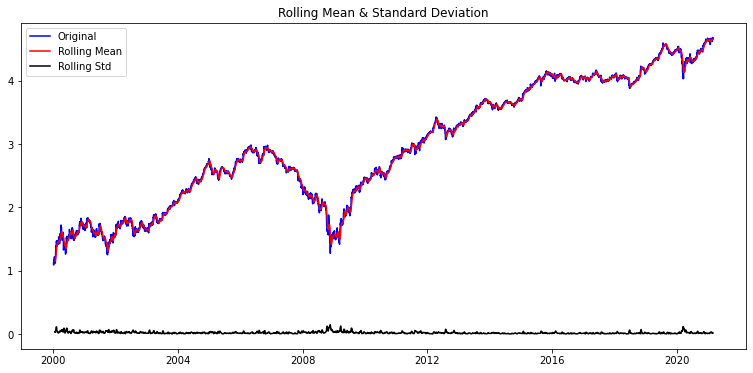

Results of Dickey-Fuller Test:
Test Statistic                   -0.778607
p-value                           0.825325
#Lags Used                        8.000000
Number of Observations Used    5316.000000
Critical Value (1%)              -3.431581
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567059
dtype: float64


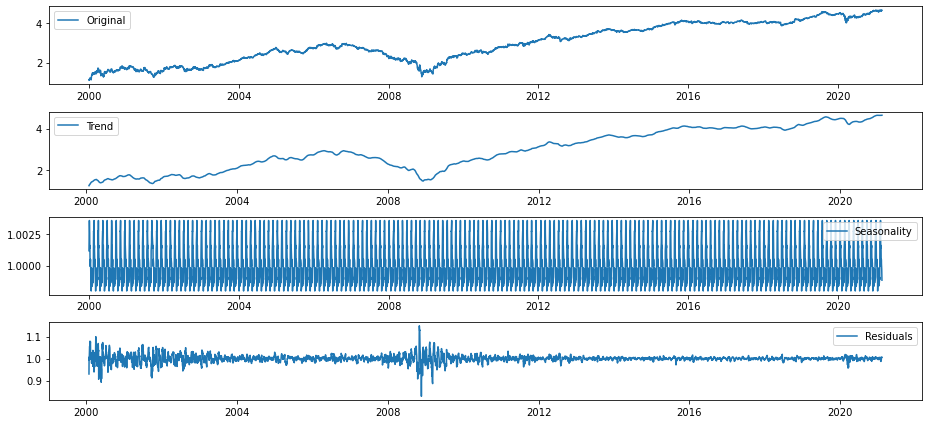

In [166]:
# 정성적 그래프 분석.
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test.
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition).
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

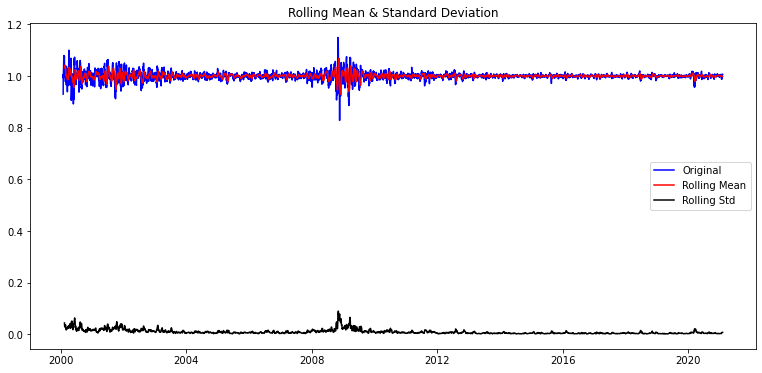

Results of Dickey-Fuller Test:
Test Statistic                -1.775451e+01
p-value                        3.358914e-30
#Lags Used                     3.300000e+01
Number of Observations Used    5.261000e+03
Critical Value (1%)           -3.431594e+00
Critical Value (5%)           -2.862090e+00
Critical Value (10%)          -2.567063e+00
dtype: float64


In [167]:
# Residual의 Stationality 여부 확인.
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

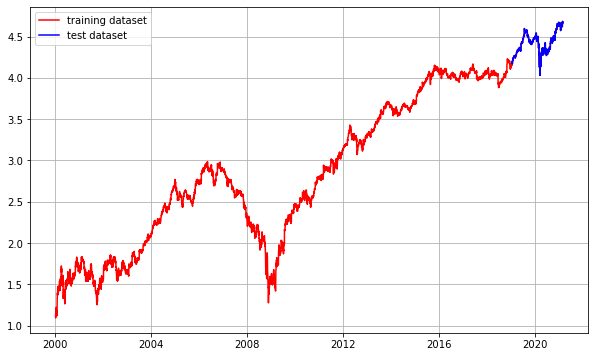

In [168]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택.
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

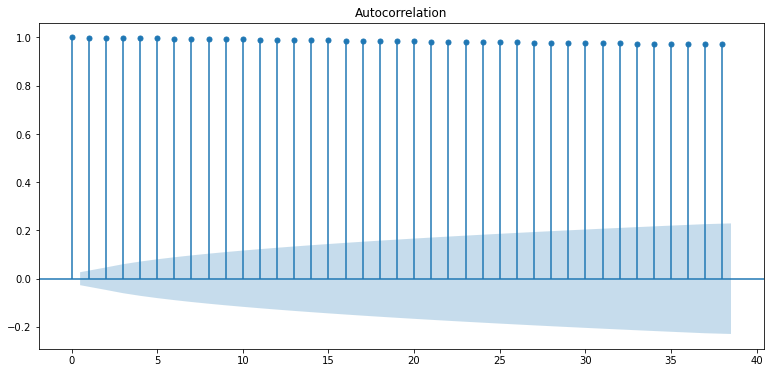

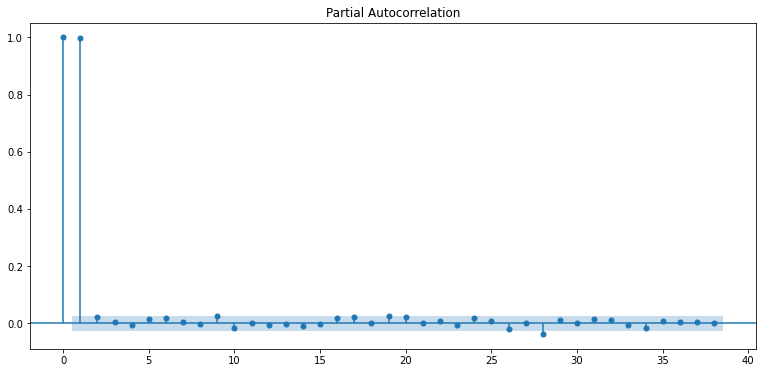

In [169]:
# ACF, PACF 그려보기 -> p,q 구하기.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기.
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기.
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -27.599279
p-value                           0.000000
#Lags Used                        7.000000
Number of Observations Used    5316.000000
Critical Value (1%)              -3.431581
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567059
dtype: float64


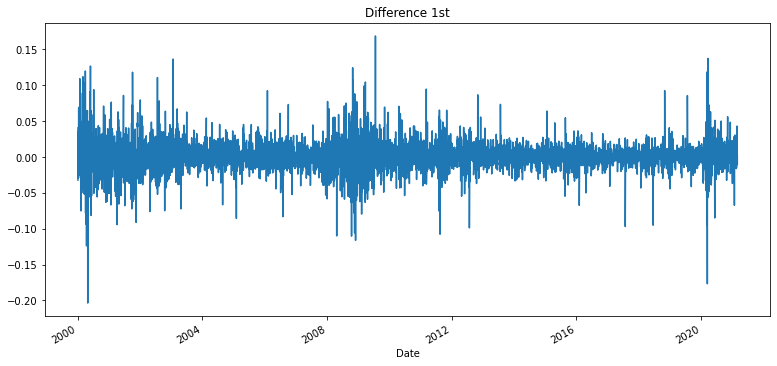

In [170]:
# 차분 안정성 확인 -> d 구하기.
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

In [171]:
from statsmodels.tsa.arima_model import ARIMA

# 모델 설계.
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4791
Model:                 ARIMA(1, 1, 0)   Log Likelihood               11653.475
Method:                       css-mle   S.D. of innovations              0.021
Date:                Thu, 04 Mar 2021   AIC                         -23300.950
Time:                        16:14:12   BIC                         -23281.526
Sample:                             1   HQIC                        -23294.127
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0006      0.000      2.228      0.026    7.66e-05       0.001
ar.L1.D.Close    -0.0761      0.014     -5.281      0.000      -0.104      -0.048
                                    Root

/home/aiffel-dj20/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj20/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

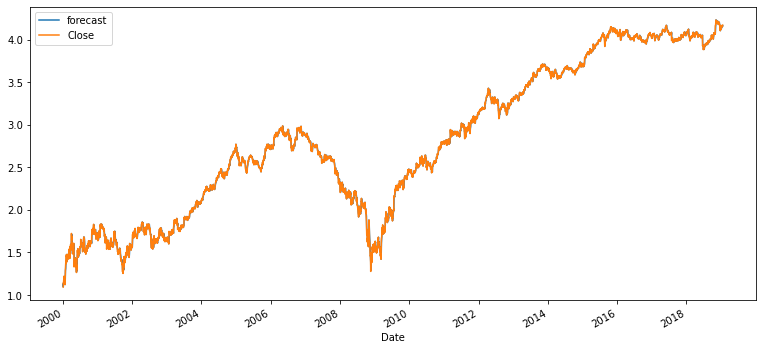

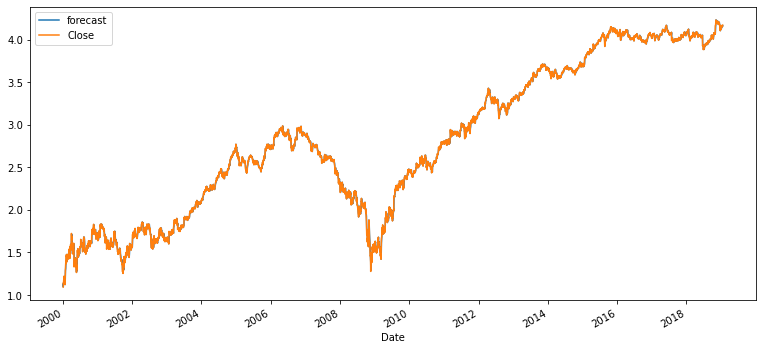

In [172]:
# 훈련 데이터에 ARIMA 모델이 잘 맞는지 시각적으로 확인.
fitted_m.plot_predict()

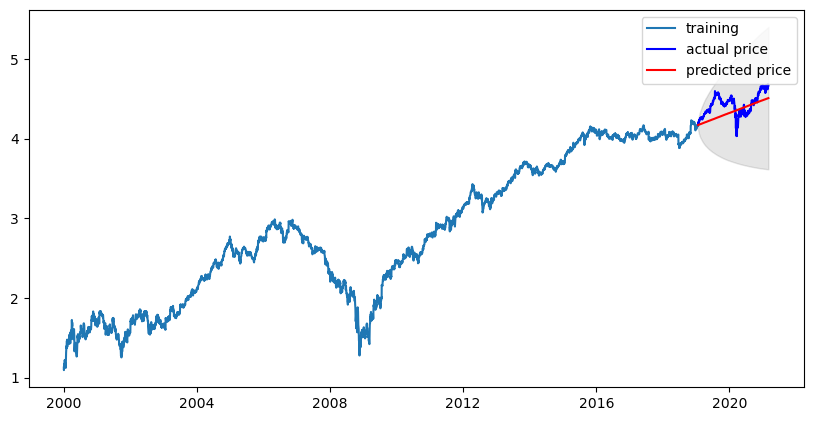

In [173]:
# Forecast(): 테스트 구간의 데이터 예측.
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf.

# Make as pandas series.
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드.
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드.

# Plot.
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [174]:
# 최종 모델의 오차율 계산.
# 로그 변환된 시계열을 사용해 왔던 것을 모두 지수 변환하여 원본의 스케일로 계산해야 타당.
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  144.89095983226784
MAE:  10.230803602617556
RMSE:  12.037066080746913
MAPE: 11.88%


### 트립어드바이저 TRIP

In [176]:
# 경로지정 후 불러오기.
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/TRIP.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


Date       Open       High        Low      Close  Adj Close   Volume
0  2011-12-07  27.500000  27.760000  24.000000  27.450001  24.410614  1413700
1  2011-12-08  26.059999  27.780001  25.760000  26.549999  23.610266   719600
2  2011-12-09  27.930000  28.000000  26.700001  27.910000  24.819681   716200
3  2011-12-12  28.280001  28.280001  27.000000  27.450001  24.410614   393300
4  2011-12-13  28.530001  28.530001  27.010000  27.500000  24.455078   452500

In [177]:
# Date를 index_col로 지정. --> 시계열 데이터 생성. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True) # index 동일.
print(type(df))

ts = df['Close'] # index 동일.
print(type(ts))
ts.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Date
2011-12-07    27.450001
2011-12-08    26.549999
2011-12-09    27.910000
2011-12-12    27.450001
2011-12-13    27.500000
Name: Close, dtype: float64

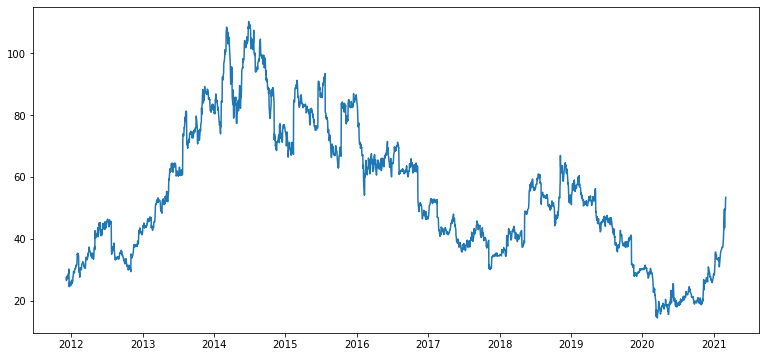

In [178]:
# 시각화로 Stationary 여부 확인.
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6  

# 시계열 데이터를 차트로 표현.
plt.plot(ts)

Series([], Name: Close, dtype: float64)


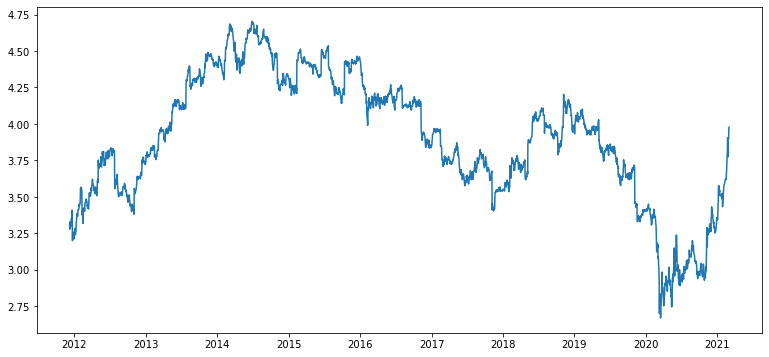

In [179]:
# 시계열에서 결측치가 있는 부분만 Series로 출력.
ts[ts.isna()]

# 결측치가 있다면 보간하기. --> 보간 기준은 time. 
ts=ts.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인.
print(ts[ts.isna()])

# 로그 변환.
ts_log = np.log(ts)

# 그래프 재확인.
plt.plot(ts_log)

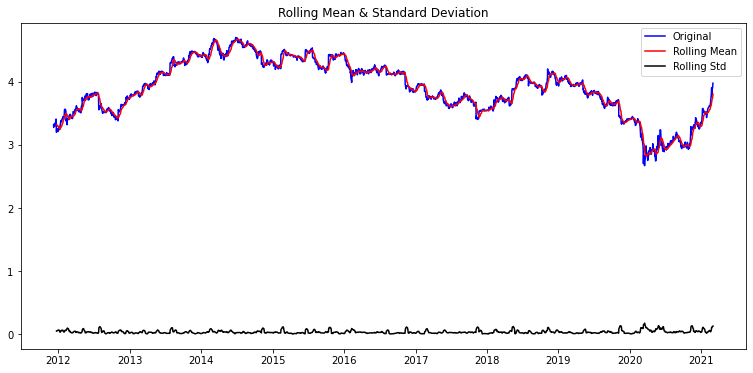

Results of Dickey-Fuller Test:
Test Statistic                   -1.949461
p-value                           0.309162
#Lags Used                        0.000000
Number of Observations Used    2322.000000
Critical Value (1%)              -3.433169
Critical Value (5%)              -2.862786
Critical Value (10%)             -2.567433
dtype: float64


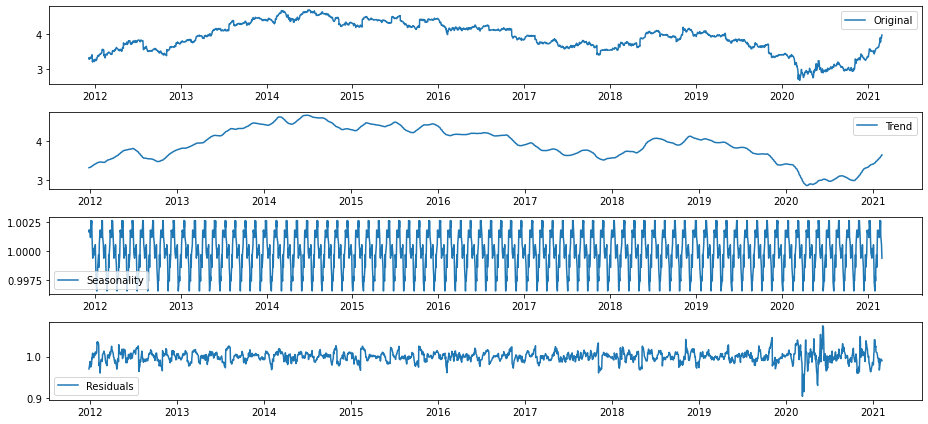

In [180]:
# 정성적 그래프 분석.
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test.
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition).
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

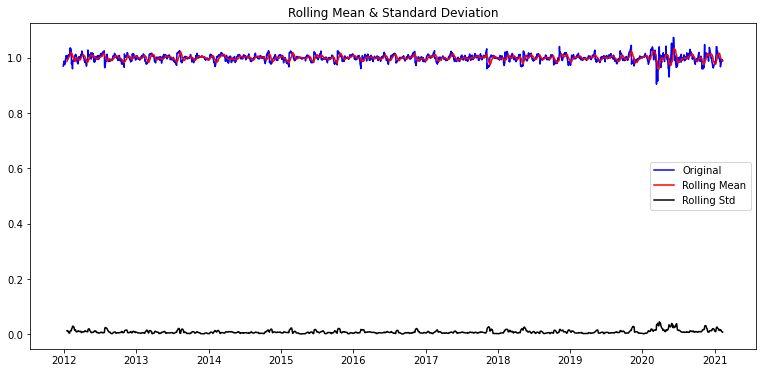

Results of Dickey-Fuller Test:
Test Statistic                -1.281152e+01
p-value                        6.431381e-24
#Lags Used                     2.700000e+01
Number of Observations Used    2.265000e+03
Critical Value (1%)           -3.433240e+00
Critical Value (5%)           -2.862817e+00
Critical Value (10%)          -2.567450e+00
dtype: float64


In [181]:
# Residual의 Stationality 여부 확인.
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

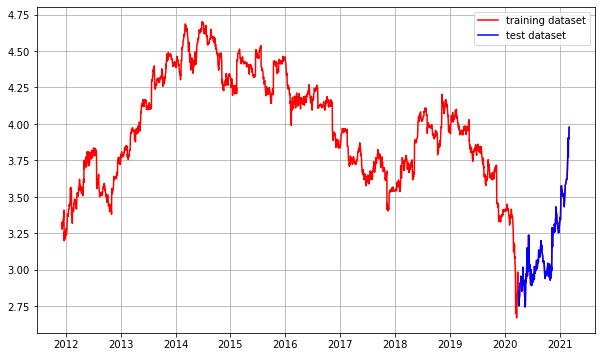

In [182]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택.
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

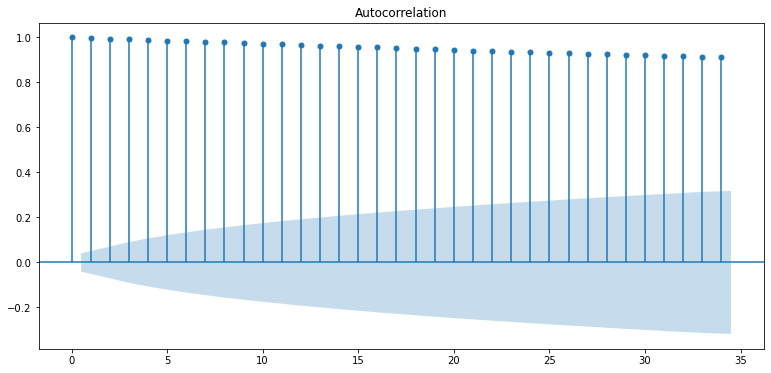

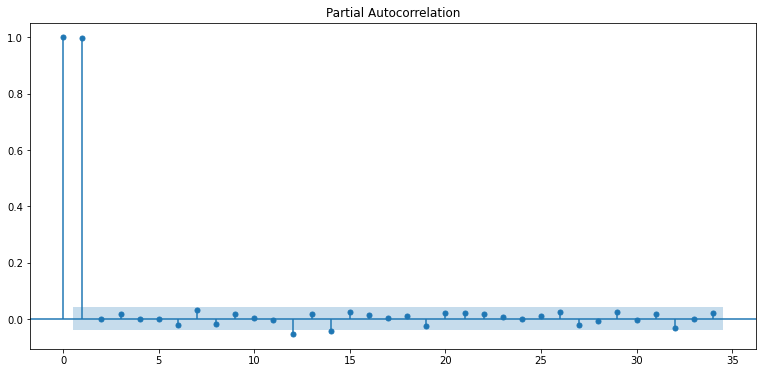

In [183]:
# ACF, PACF 그려보기 -> p,q 구하기.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기.
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기.
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -48.609765
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    2321.000000
Critical Value (1%)              -3.433171
Critical Value (5%)              -2.862786
Critical Value (10%)             -2.567433
dtype: float64


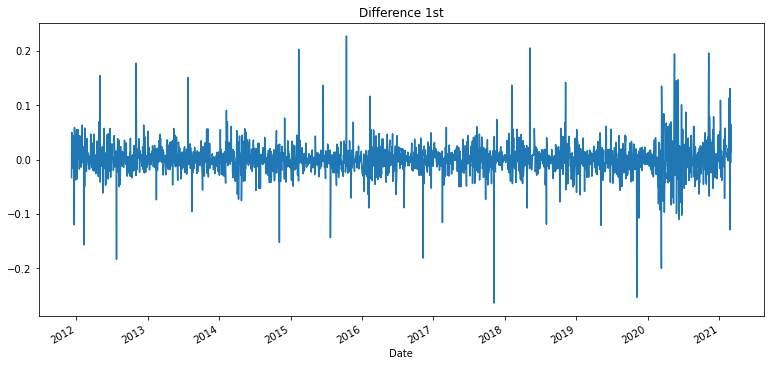

In [184]:
# 차분 안정성 확인 -> d 구하기.
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

In [185]:
from statsmodels.tsa.arima_model import ARIMA

# 모델 설계.
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2089
Model:                 ARIMA(1, 1, 0)   Log Likelihood                4472.044
Method:                       css-mle   S.D. of innovations              0.028
Date:                Thu, 04 Mar 2021   AIC                          -8938.087
Time:                        16:16:59   BIC                          -8921.154
Sample:                             1   HQIC                         -8931.883
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0002      0.001     -0.326      0.744      -0.001       0.001
ar.L1.D.Close     0.0138      0.022      0.630      0.529      -0.029       0.057
                                    Root

/home/aiffel-dj20/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj20/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

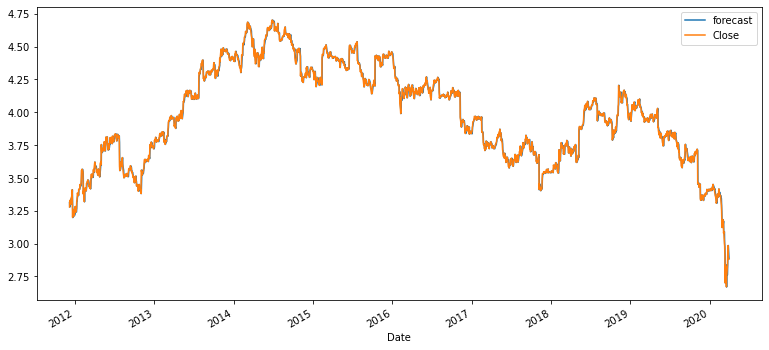

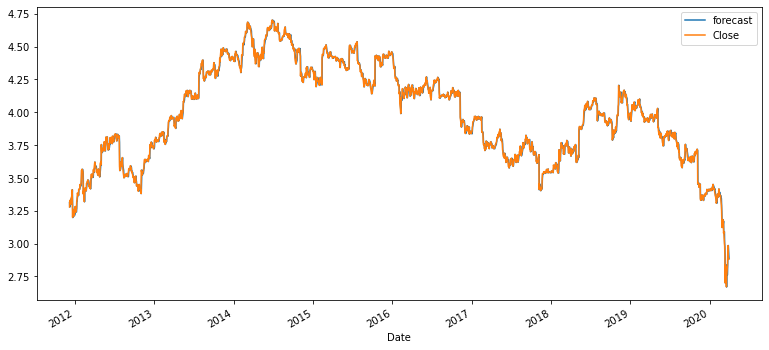

In [186]:
# 훈련 데이터에 ARIMA 모델이 잘 맞는지 시각적으로 확인.
fitted_m.plot_predict()

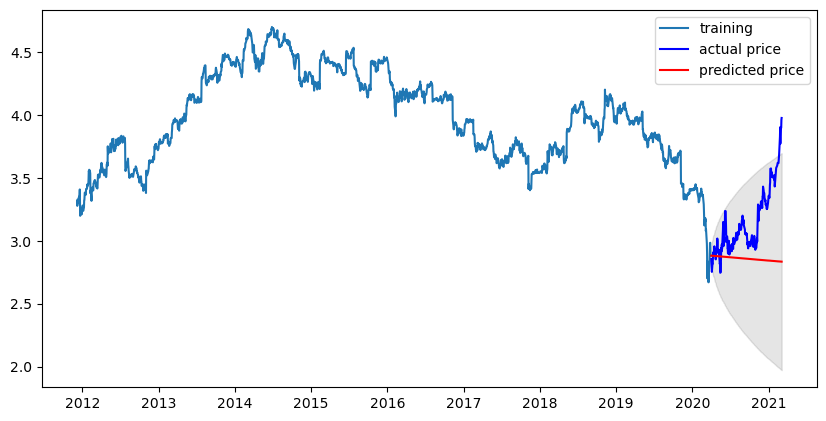

In [187]:
# Forecast(): 테스트 구간의 데이터 예측.
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf.

# Make as pandas series.
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드.
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드.

# Plot.
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [188]:
# 최종 모델의 오차율 계산.
# 로그 변환된 시계열을 사용해 왔던 것을 모두 지수 변환하여 원본의 스케일로 계산해야 타당.
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  100.70515623841113
MAE:  6.876437930139627
RMSE:  10.035195874441671
MAPE: 23.49%


### 마이크로소프트 MSFT 

In [197]:
# 경로지정 후 불러오기.
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/MSFT.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


Date      Open      High       Low     Close  Adj Close      Volume
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.061751  1031788800
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.063956   308160000
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.065059   133171200
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.063405    67766400
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.062302    47894400

In [198]:
# Date를 index_col로 지정. --> 시계열 데이터 생성. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True) # index 동일.
print(type(df))

ts = df['Close'] # index 동일.
print(type(ts))
ts.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Date
1986-03-13    0.097222
1986-03-14    0.100694
1986-03-17    0.102431
1986-03-18    0.099826
1986-03-19    0.098090
Name: Close, dtype: float64

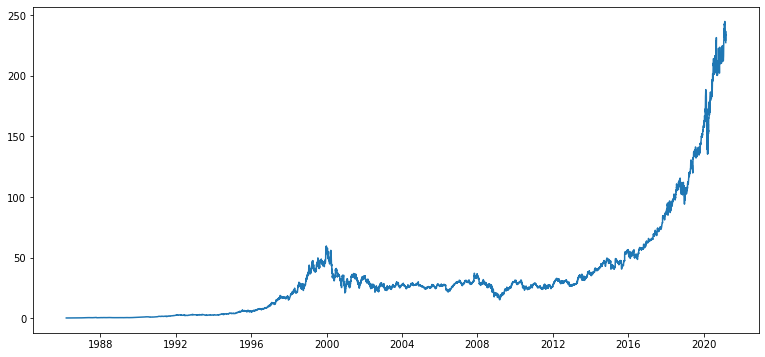

In [202]:
# 시각화로 Stationary 여부 확인.
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6  

# 시계열 데이터를 차트로 표현.
plt.plot(ts)

In [203]:
# 시계열에서 결측치가 있는 부분만 Series로 출력.
ts[ts.isna()]

# 결측치가 있다면 보간하기. --> 보간 기준은 time. 
ts=ts.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인.
print(ts[ts.isna()])

# 로그 변환.
ts_log = np.log(ts)

Series([], Name: Close, dtype: float64)


In [204]:
# 음수가 있으면 Multiplicative seasonality 에러가 나기 때문에
# 2000년까지 자료를 잘라주기.
print(ts_log['2000-01-01':])
ts_log = ts_log['2000-01-01':]

Date
2000-01-03    4.065280
2000-01-04    4.030917
2000-01-05    4.041405
2000-01-06    4.007333
2000-01-07    4.020317
                ...   
2021-02-25    5.433678
2021-02-26    5.448374
2021-03-01    5.467807
2021-03-02    5.454765
2021-03-03    5.427414
Name: Close, Length: 5325, dtype: float64


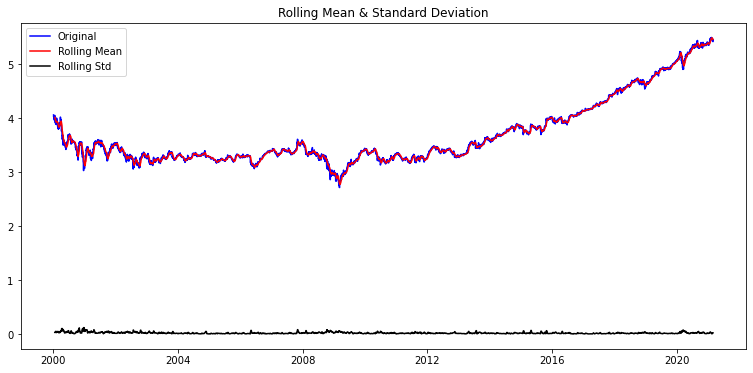

Results of Dickey-Fuller Test:
Test Statistic                    1.040404
p-value                           0.994674
#Lags Used                        8.000000
Number of Observations Used    5316.000000
Critical Value (1%)              -3.431581
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567059
dtype: float64


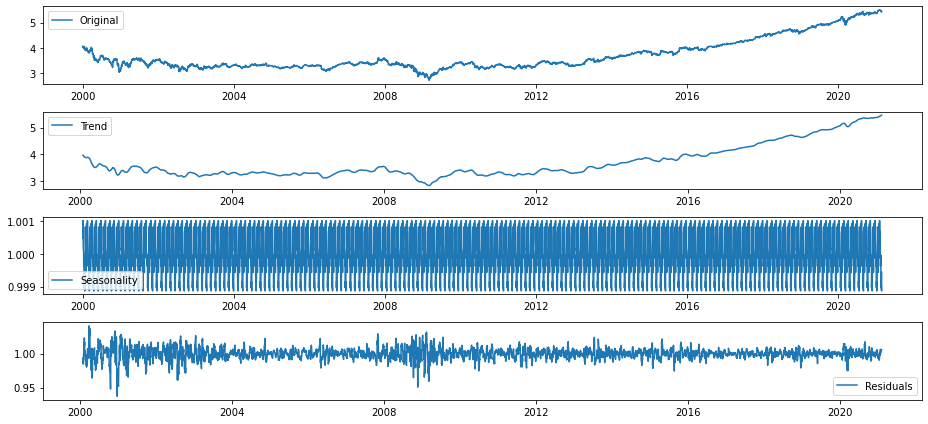

In [205]:
# 정성적 그래프 분석.
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test.
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition).
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

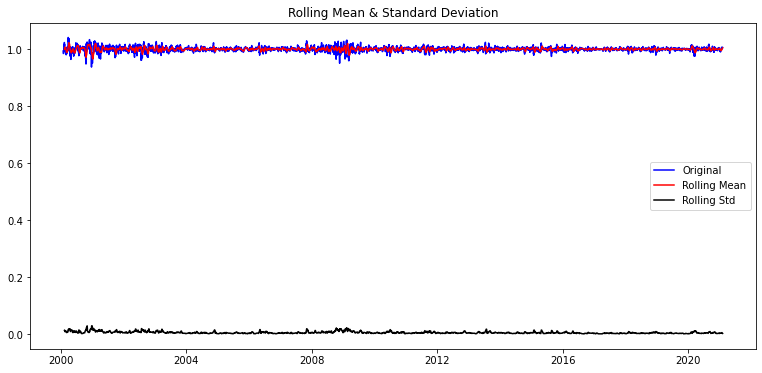

Results of Dickey-Fuller Test:
Test Statistic                  -19.444882
p-value                           0.000000
#Lags Used                       32.000000
Number of Observations Used    5262.000000
Critical Value (1%)              -3.431593
Critical Value (5%)              -2.862089
Critical Value (10%)             -2.567062
dtype: float64


In [206]:
# Residual의 Stationality 여부 확인.
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

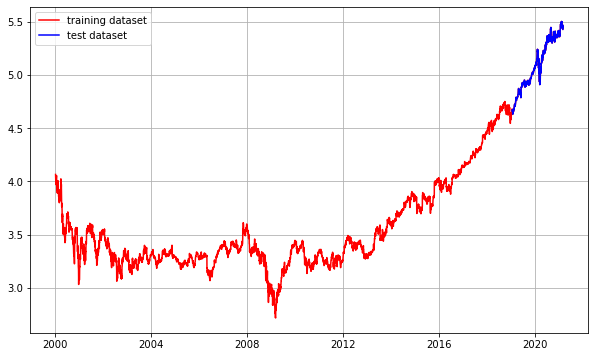

In [207]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택.
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

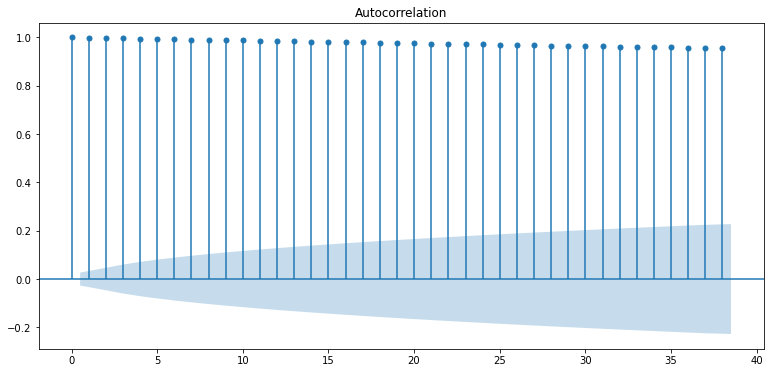

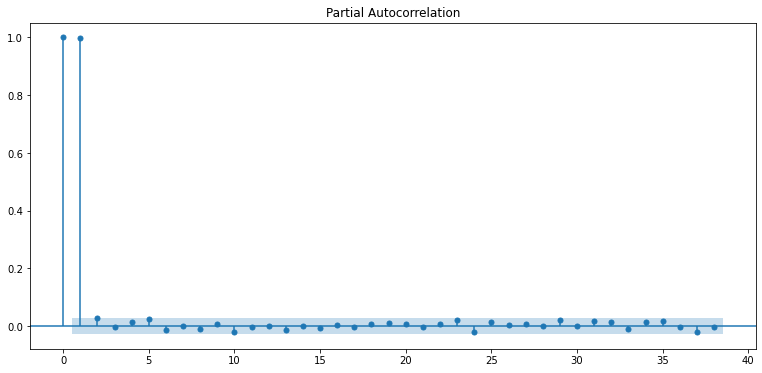

In [208]:
# ACF, PACF 그려보기 -> p,q 구하기.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기.
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기.
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -27.364461
p-value                           0.000000
#Lags Used                        7.000000
Number of Observations Used    5316.000000
Critical Value (1%)              -3.431581
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567059
dtype: float64


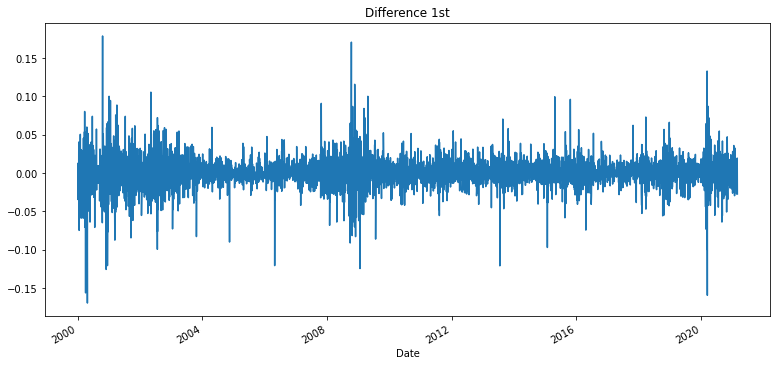

In [209]:
# 차분 안정성 확인 -> d 구하기.
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

In [210]:
from statsmodels.tsa.arima_model import ARIMA

# 모델 설계.
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4791
Model:                 ARIMA(1, 1, 0)   Log Likelihood               12118.642
Method:                       css-mle   S.D. of innovations              0.019
Date:                Thu, 04 Mar 2021   AIC                         -24231.284
Time:                        16:27:41   BIC                         -24211.861
Sample:                             1   HQIC                        -24224.462
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0001      0.000      0.483      0.629      -0.000       0.001
ar.L1.D.Close    -0.0473      0.014     -3.276      0.001      -0.076      -0.019
                                    Root

/home/aiffel-dj20/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj20/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

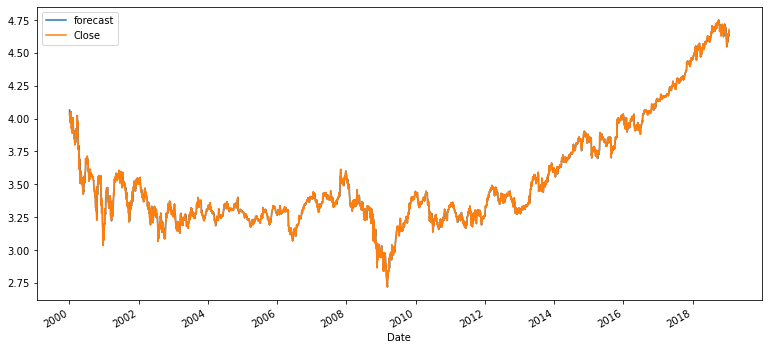

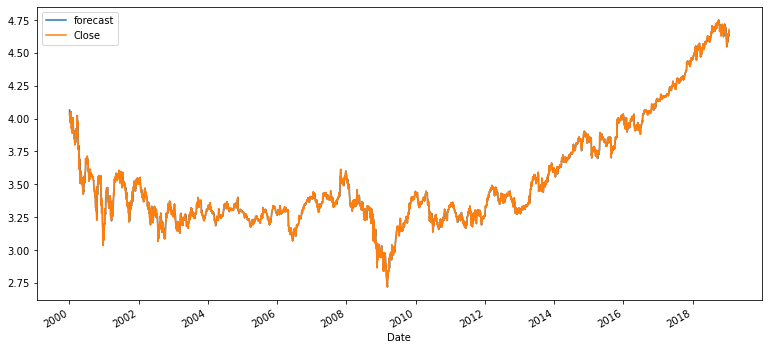

In [211]:
# 훈련 데이터에 ARIMA 모델이 잘 맞는지 시각적으로 확인.
fitted_m.plot_predict()

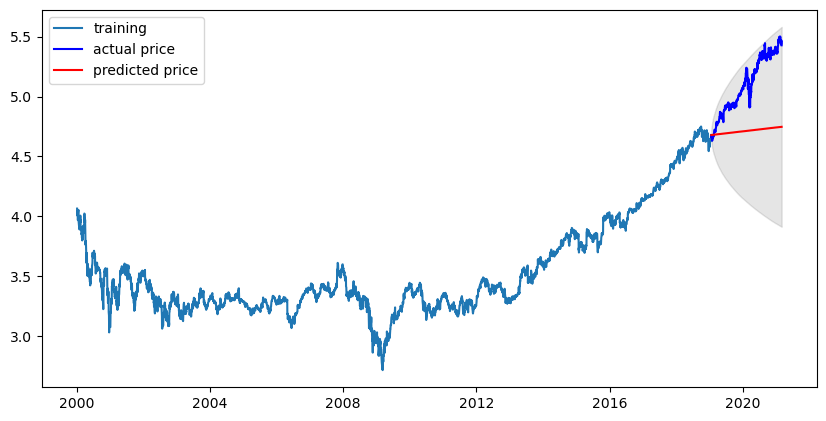

In [212]:
# Forecast(): 테스트 구간의 데이터 예측.
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf.

# Make as pandas series.
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드.
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드.

# Plot.
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [213]:
# 최종 모델의 오차율 계산.
# 로그 변환된 시계열을 사용해 왔던 것을 모두 지수 변환하여 원본의 스케일로 계산해야 타당.
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  4633.343964886574
MAE:  57.25773137316049
RMSE:  68.06867094990598
MAPE: 30.58%


*****

## 주식 예측 결과

||진원생명과학|한라|코오롱 글로벌|강원랜드|
|----|:----:|:----:|:----:|:----:|
|예측|평탄|평탄|하강|상승|
|MAPE|41.63%|28.14%|34.00%|33.48%|



||테슬라|스타벅스|트립어드바이저|마이크로소프트|
|----|:----:|:----:|:----:|:----:|
|예측|상승|상승|약하강|약상승|
|MAPE|43.97%|11.88%|23.49%|30.58%|

- **나나 내 가족이 보유한 종목들은 예측하기 어려운 그래프 모양을 가지고 있어 예측값과 실제값이 상당한 차이를 보여 MAPE이 높게 나타나고 있음.**     
- **수강생들에게 수소문하여 그래프가 정갈한 종목을 찾아 모델을 돌려보겠음.**

## 정갈한 모양을 가진 종목들

### 현대자동차 005380

In [214]:
# 경로지정 후 불러오기.
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/Hyundai_Motor.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


Date     Open     High      Low    Close     Adj Close     Volume
0  2000-01-04  19000.0  20700.0  18600.0  20700.0  13315.544922  2028300.0
1  2000-01-05  21000.0  22500.0  19500.0  20800.0  13379.874023  4091600.0
2  2000-01-06  21300.0  21700.0  19100.0  19700.0  12672.283203  1899300.0
3  2000-01-07  20900.0  21100.0  20000.0  20300.0  13058.238281  2206900.0
4  2000-01-10  21500.0  21600.0  19750.0  20000.0  12865.261719  1931800.0

In [215]:
# Date를 index_col로 지정. --> 시계열 데이터 생성. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True) # index 동일.
print(type(df))

ts = df['Close'] # index 동일.
print(type(ts))
ts.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Date
2000-01-04    20700.0
2000-01-05    20800.0
2000-01-06    19700.0
2000-01-07    20300.0
2000-01-10    20000.0
Name: Close, dtype: float64

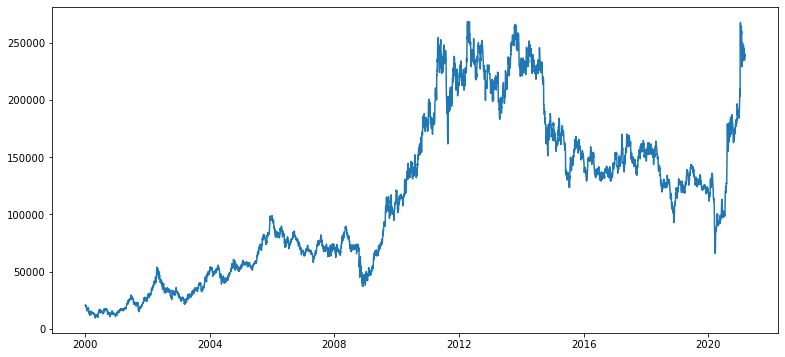

In [216]:
# 시각화로 Stationary 여부 확인.
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6  

# 시계열 데이터를 차트로 표현.
plt.plot(ts)

Series([], Name: Close, dtype: float64)


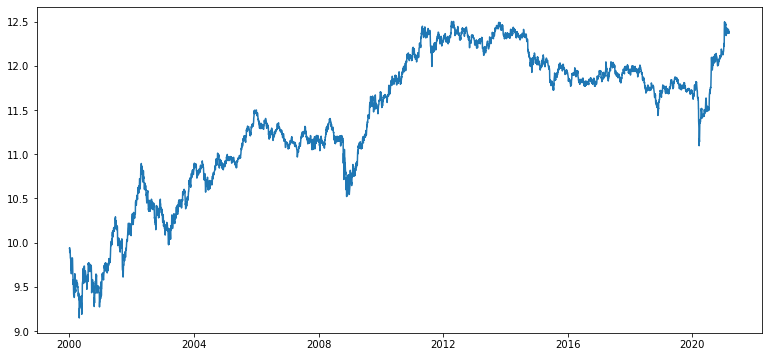

In [217]:
# 시계열에서 결측치가 있는 부분만 Series로 출력.
ts[ts.isna()]

# 결측치가 있다면 보간하기. --> 보간 기준은 time. 
ts=ts.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인.
print(ts[ts.isna()])

# 로그 변환.
ts_log = np.log(ts)

# 그래프 재확인.
plt.plot(ts_log)

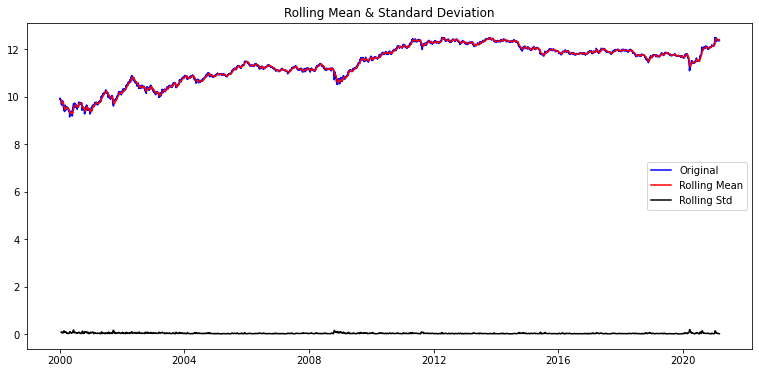

Results of Dickey-Fuller Test:
Test Statistic                   -1.528098
p-value                           0.519569
#Lags Used                        5.000000
Number of Observations Used    5315.000000
Critical Value (1%)              -3.431581
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567060
dtype: float64


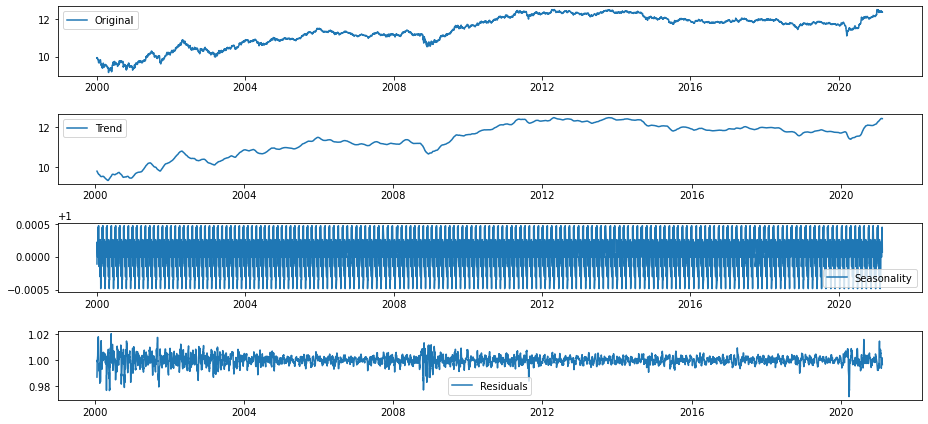

In [218]:
# 정성적 그래프 분석.
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test.
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition).
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

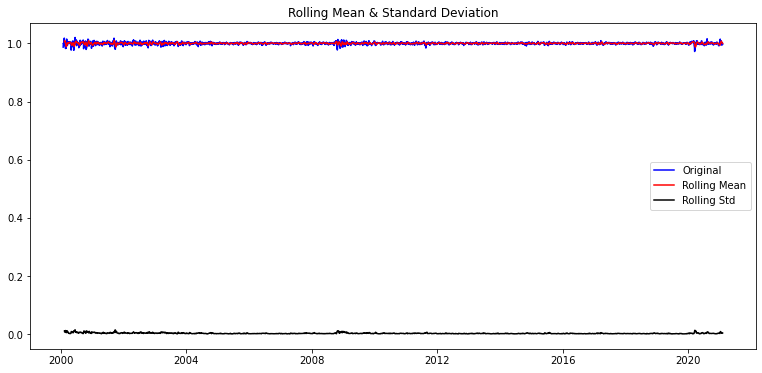

Results of Dickey-Fuller Test:
Test Statistic                -1.761253e+01
p-value                        3.873332e-30
#Lags Used                     3.300000e+01
Number of Observations Used    5.257000e+03
Critical Value (1%)           -3.431595e+00
Critical Value (5%)           -2.862090e+00
Critical Value (10%)          -2.567063e+00
dtype: float64


In [219]:
# Residual의 Stationality 여부 확인.
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

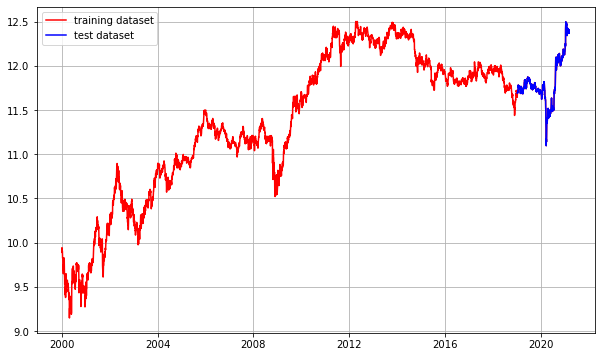

In [220]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택.
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

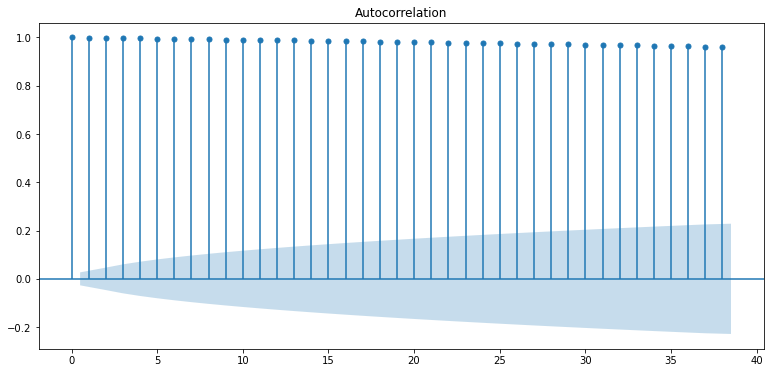

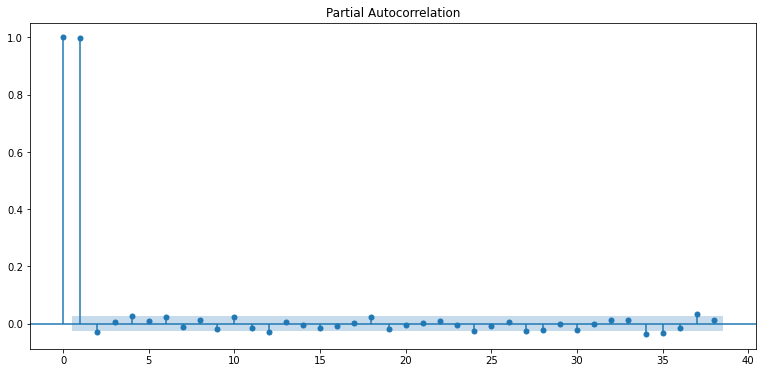

In [221]:
# ACF, PACF 그려보기 -> p,q 구하기.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기.
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기.
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -34.854746
p-value                           0.000000
#Lags Used                        4.000000
Number of Observations Used    5315.000000
Critical Value (1%)              -3.431581
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567060
dtype: float64


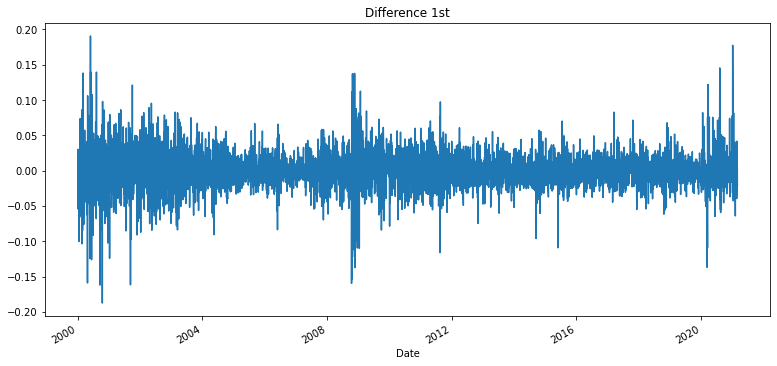

In [222]:
# 차분 안정성 확인 -> d 구하기.
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

In [223]:
from statsmodels.tsa.arima_model import ARIMA

# 모델 설계.
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4787
Model:                 ARIMA(1, 1, 0)   Log Likelihood               10602.230
Method:                       css-mle   S.D. of innovations              0.026
Date:                Thu, 04 Mar 2021   AIC                         -21198.459
Time:                        16:50:26   BIC                         -21179.039
Sample:                             1   HQIC                        -21191.638
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0004      0.000      0.919      0.358      -0.000       0.001
ar.L1.D.Close     0.0281      0.014      1.942      0.052      -0.000       0.056
                                    Root

/home/aiffel-dj20/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj20/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

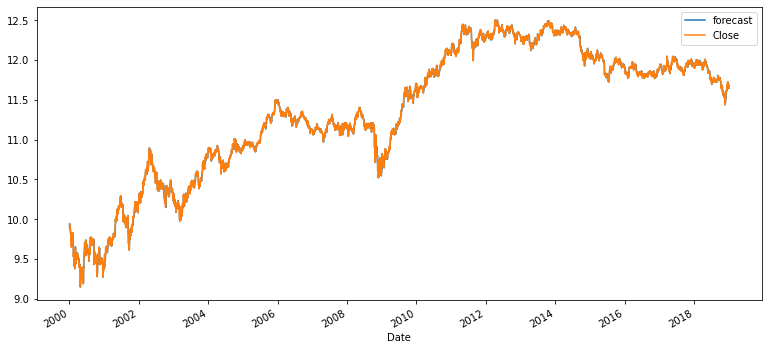

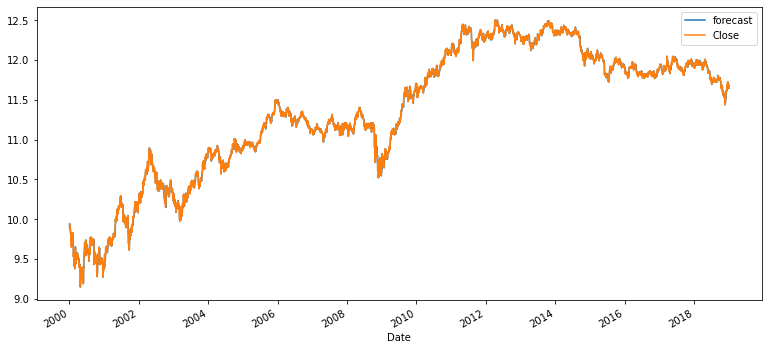

In [224]:
# 훈련 데이터에 ARIMA 모델이 잘 맞는지 시각적으로 확인.
fitted_m.plot_predict()

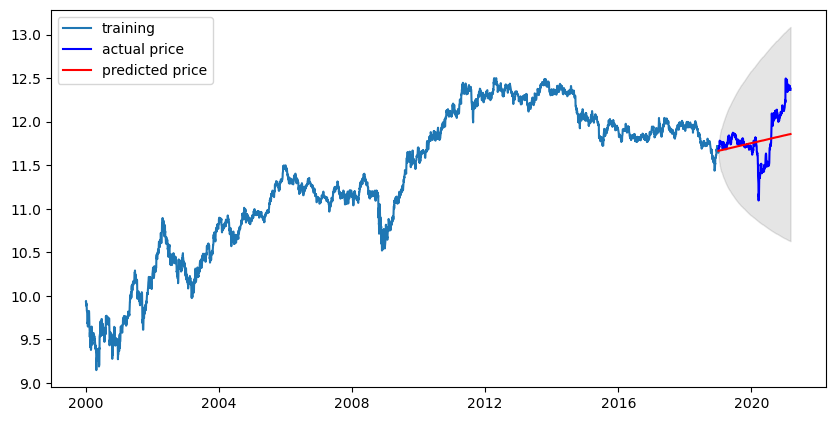

In [225]:
# Forecast(): 테스트 구간의 데이터 예측.
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf.

# Make as pandas series.
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드.
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드.

# Plot.
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [226]:
# 최종 모델의 오차율 계산.
# 로그 변환된 시계열을 사용해 왔던 것을 모두 지수 변환하여 원본의 스케일로 계산해야 타당.
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1405895669.2341325
MAE:  25757.983126286348
RMSE:  37495.27529215025
MAPE: 17.40%


### 대한항공 003490

In [227]:
# 경로지정 후 불러오기.
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/Korean_Air.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


Date          Open          High           Low         Close  \
0  2000-01-04  10680.292969  11778.267578  10680.292969  11778.267578   
1  2000-01-05  11578.635742  13075.873047  11079.556641  13075.873047   
2  2000-01-06  12976.057617  12976.057617  11279.188477  11578.635742   
3  2000-01-07  11977.899414  12227.438477  11379.003906  11977.899414   
4  2000-01-10  11778.267578  12177.530273  11628.543945  11728.359375   

      Adj Close     Volume  
0  11098.211914  2251546.0  
1  12320.895508  2649880.0  
2  10910.107422  1865535.0  
3  11286.316406  1596440.0  
4  11051.185547  1045826.0

In [228]:
# Date를 index_col로 지정. --> 시계열 데이터 생성. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True) # index 동일.
print(type(df))

ts = df['Close'] # index 동일.
print(type(ts))
ts.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Date
2000-01-04    11778.267578
2000-01-05    13075.873047
2000-01-06    11578.635742
2000-01-07    11977.899414
2000-01-10    11728.359375
Name: Close, dtype: float64

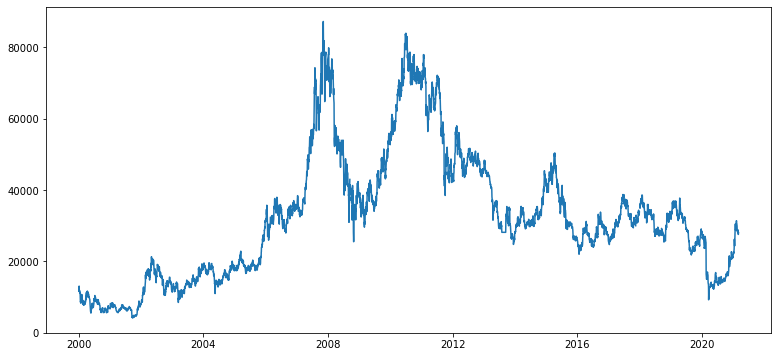

In [229]:
# 시각화로 Stationary 여부 확인.
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6  

# 시계열 데이터를 차트로 표현.
plt.plot(ts)

Series([], Name: Close, dtype: float64)


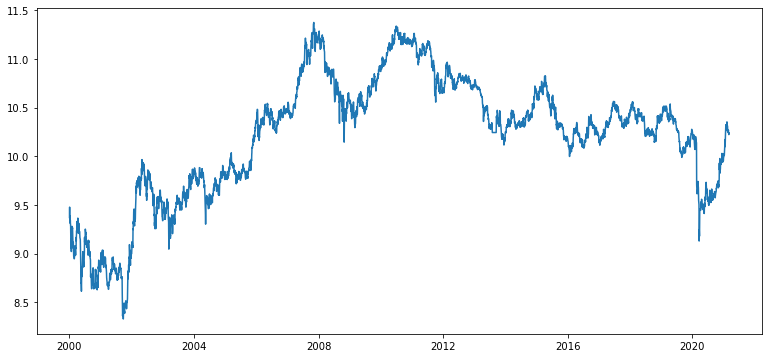

In [230]:
# 시계열에서 결측치가 있는 부분만 Series로 출력.
ts[ts.isna()]

# 결측치가 있다면 보간하기. --> 보간 기준은 time. 
ts=ts.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인.
print(ts[ts.isna()])

# 로그 변환.
ts_log = np.log(ts)

# 그래프 재확인.
plt.plot(ts_log)

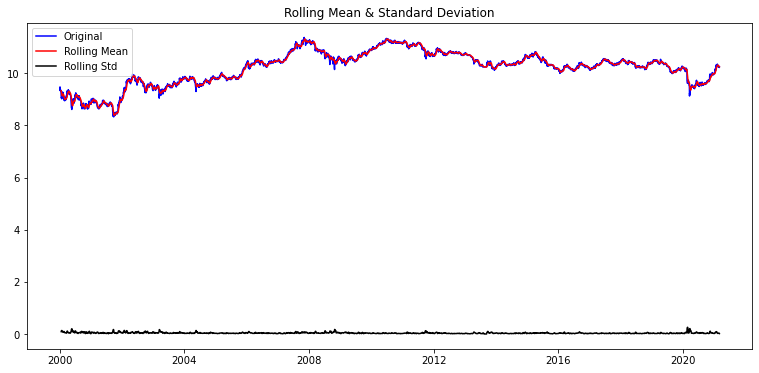

Results of Dickey-Fuller Test:
Test Statistic                   -1.991837
p-value                           0.290164
#Lags Used                       21.000000
Number of Observations Used    5299.000000
Critical Value (1%)              -3.431585
Critical Value (5%)              -2.862086
Critical Value (10%)             -2.567060
dtype: float64


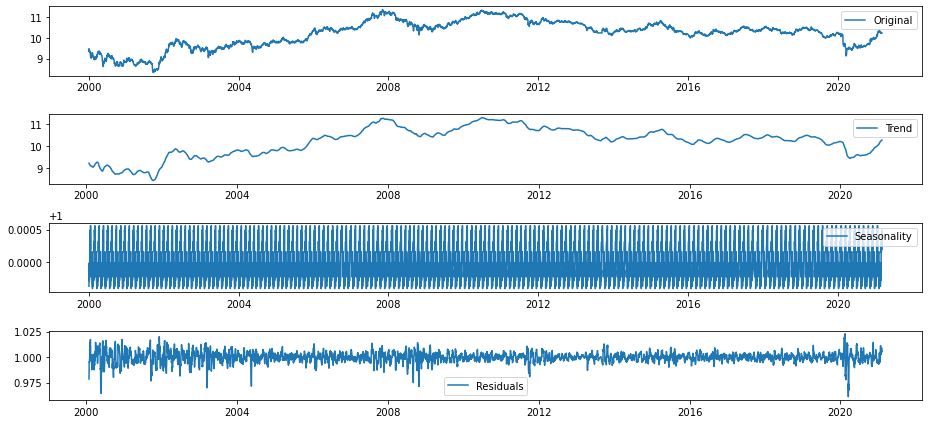

In [231]:
# 정성적 그래프 분석.
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test.
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition).
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

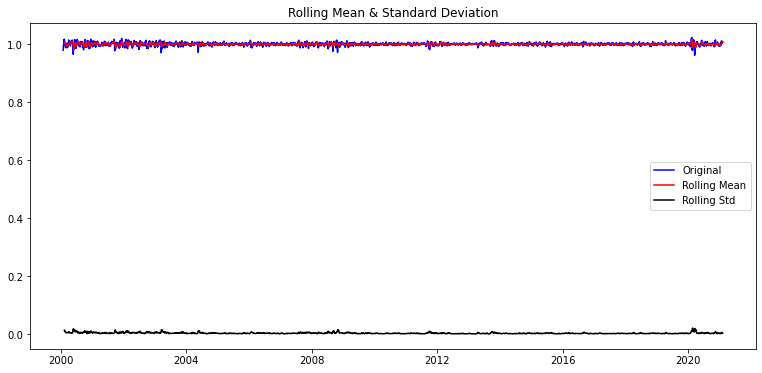

Results of Dickey-Fuller Test:
Test Statistic                  -20.260833
p-value                           0.000000
#Lags Used                       24.000000
Number of Observations Used    5266.000000
Critical Value (1%)              -3.431592
Critical Value (5%)              -2.862089
Critical Value (10%)             -2.567062
dtype: float64


In [232]:
# Residual의 Stationality 여부 확인.
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

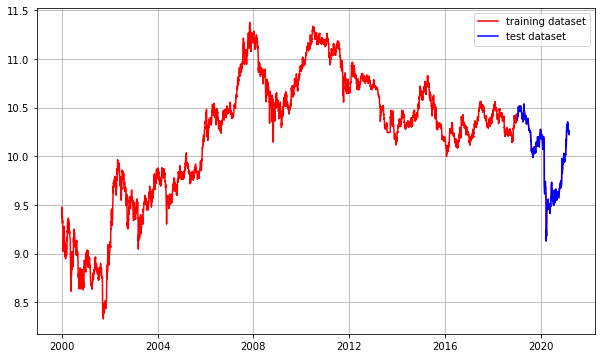

In [233]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택.
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

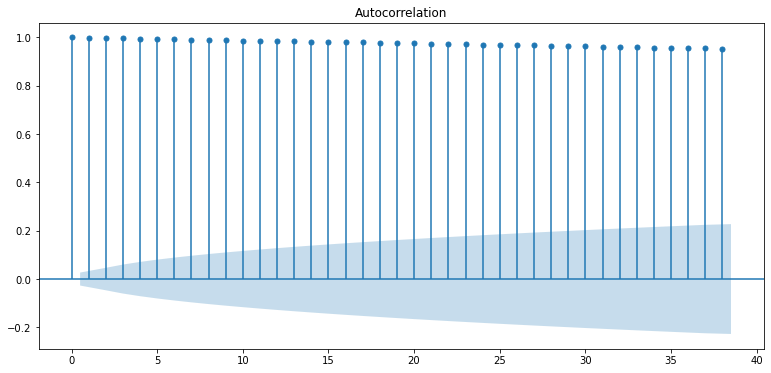

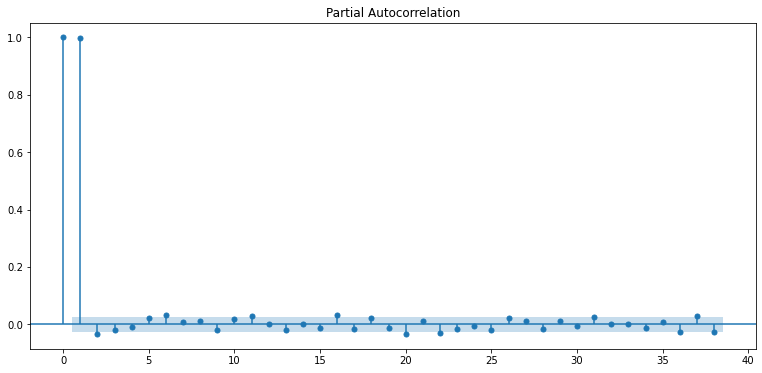

In [234]:
# ACF, PACF 그려보기 -> p,q 구하기.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기.
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기.
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -20.737345
p-value                           0.000000
#Lags Used                       14.000000
Number of Observations Used    5305.000000
Critical Value (1%)              -3.431583
Critical Value (5%)              -2.862085
Critical Value (10%)             -2.567060
dtype: float64


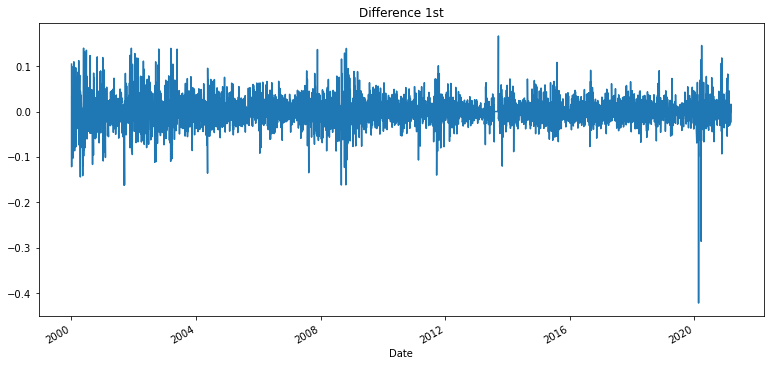

In [235]:
# 차분 안정성 확인 -> d 구하기.
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

In [236]:
from statsmodels.tsa.arima_model import ARIMA

# 모델 설계.
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4787
Model:                 ARIMA(1, 1, 0)   Log Likelihood               10116.925
Method:                       css-mle   S.D. of innovations              0.029
Date:                Thu, 04 Mar 2021   AIC                         -20227.850
Time:                        16:53:24   BIC                         -20208.429
Sample:                             1   HQIC                        -20221.029
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.000      0.468      0.640      -0.001       0.001
ar.L1.D.Close     0.0506      0.014      3.498      0.000       0.022       0.079
                                    Root

/home/aiffel-dj20/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj20/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

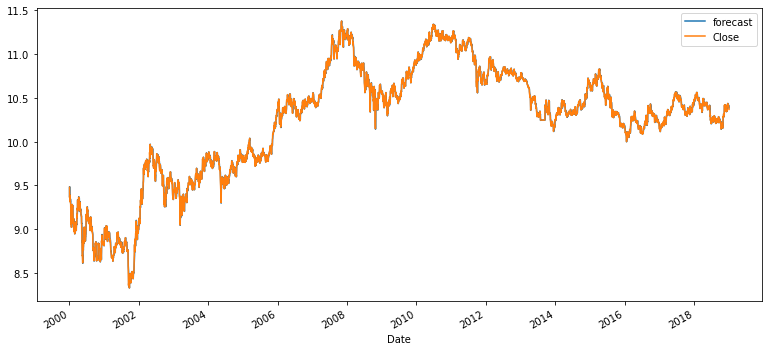

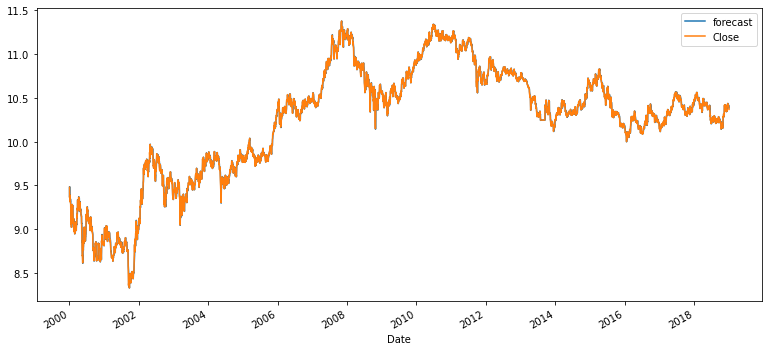

In [237]:
# 훈련 데이터에 ARIMA 모델이 잘 맞는지 시각적으로 확인.
fitted_m.plot_predict()

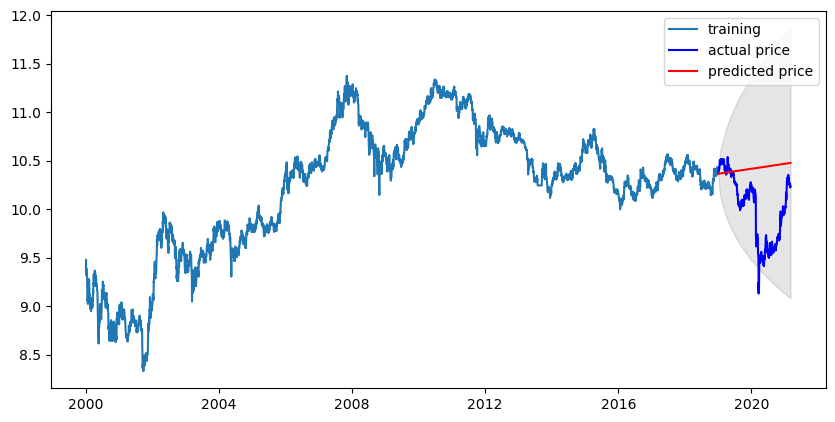

In [238]:
# Forecast(): 테스트 구간의 데이터 예측.
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf.

# Make as pandas series.
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드.
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드.

# Plot.
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [239]:
# 최종 모델의 오차율 계산.
# 로그 변환된 시계열을 사용해 왔던 것을 모두 지수 변환하여 원본의 스케일로 계산해야 타당.
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  171843036.15370378
MAE:  10959.347044320635
RMSE:  13108.891492178269
MAPE: 64.24%


### SK 텔레콤 017670

In [240]:
# 경로지정 후 불러오기.
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/SKT.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


Date      Open      High       Low     Close      Adj Close    Volume
0  2000-01-04  390100.0  405000.0  347000.0  380000.0  193175.843750  359000.0
1  2000-01-05  323000.0  365000.0  323000.0  323000.0  164199.468750  572000.0
2  2000-01-06  350000.0  352000.0  322500.0  328700.0  167097.078125  418000.0
3  2000-01-07  308000.0  350000.0  307000.0  336000.0  170808.109375  342000.0
4  2000-01-10  360000.0  383000.0  355000.0  370000.0  188092.250000  270000.0

In [241]:
# Date를 index_col로 지정. --> 시계열 데이터 생성. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True) # index 동일.
print(type(df))

ts = df['Close'] # index 동일.
print(type(ts))
ts.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Date
2000-01-04    380000.0
2000-01-05    323000.0
2000-01-06    328700.0
2000-01-07    336000.0
2000-01-10    370000.0
Name: Close, dtype: float64

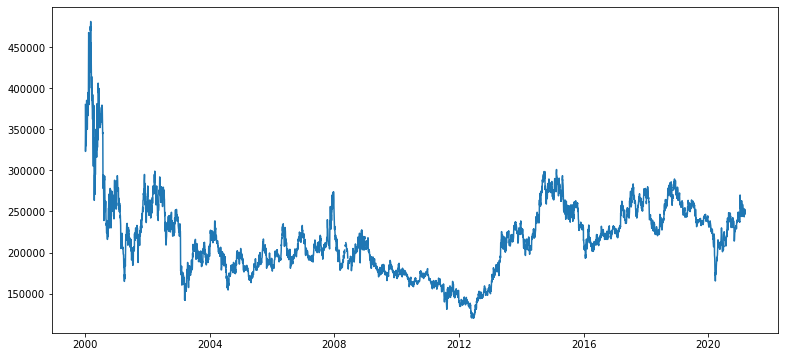

In [242]:
# 시각화로 Stationary 여부 확인.
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6  

# 시계열 데이터를 차트로 표현.
plt.plot(ts)

Series([], Name: Close, dtype: float64)


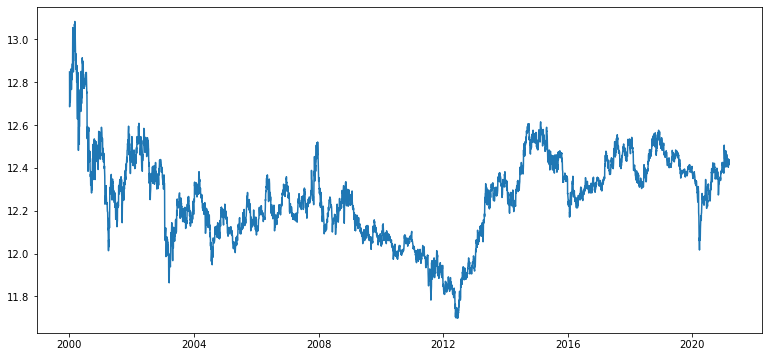

In [243]:
# 시계열에서 결측치가 있는 부분만 Series로 출력.
ts[ts.isna()]

# 결측치가 있다면 보간하기. --> 보간 기준은 time. 
ts=ts.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인.
print(ts[ts.isna()])

# 로그 변환.
ts_log = np.log(ts)

# 그래프 재확인.
plt.plot(ts_log)

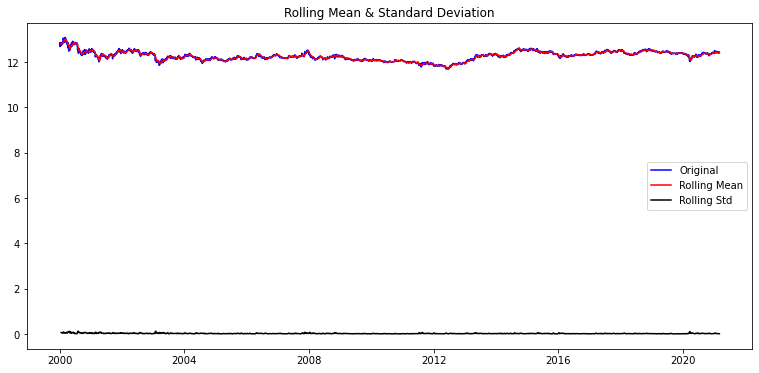

Results of Dickey-Fuller Test:
Test Statistic                   -3.437565
p-value                           0.009743
#Lags Used                       15.000000
Number of Observations Used    5305.000000
Critical Value (1%)              -3.431583
Critical Value (5%)              -2.862085
Critical Value (10%)             -2.567060
dtype: float64


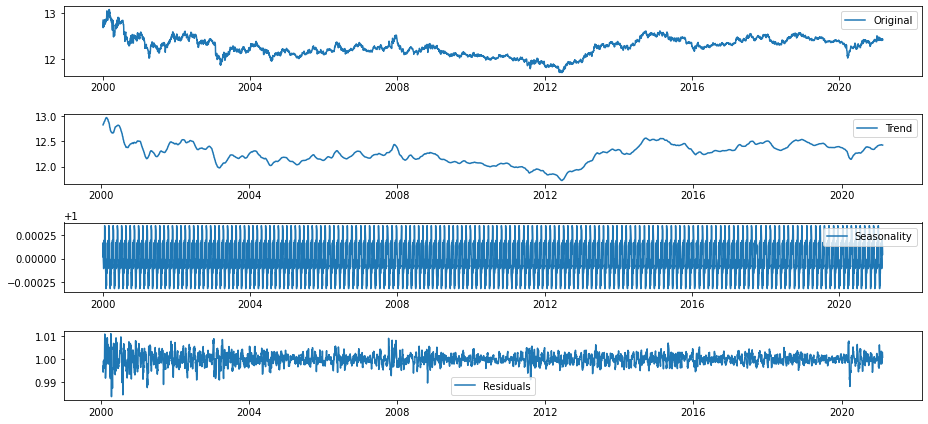

In [244]:
# 정성적 그래프 분석.
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test.
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition).
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

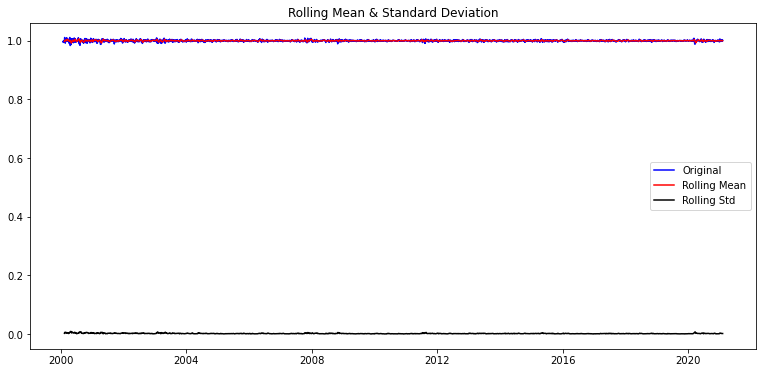

Results of Dickey-Fuller Test:
Test Statistic                -1.728440e+01
p-value                        5.755567e-30
#Lags Used                     3.300000e+01
Number of Observations Used    5.257000e+03
Critical Value (1%)           -3.431595e+00
Critical Value (5%)           -2.862090e+00
Critical Value (10%)          -2.567063e+00
dtype: float64


In [245]:
# Residual의 Stationality 여부 확인.
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

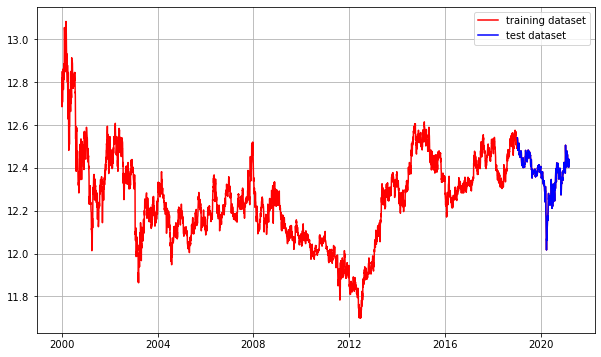

In [246]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택.
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

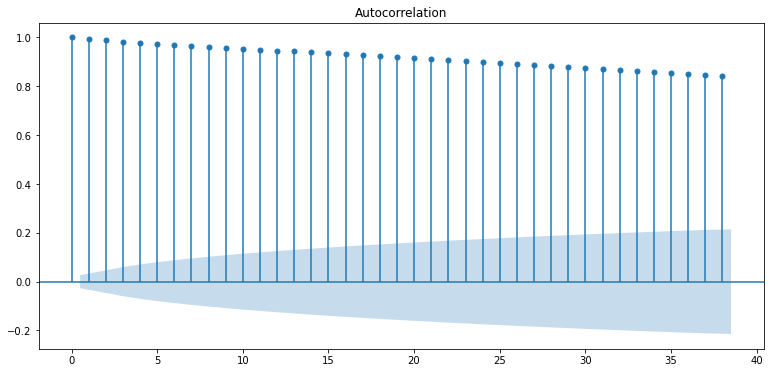

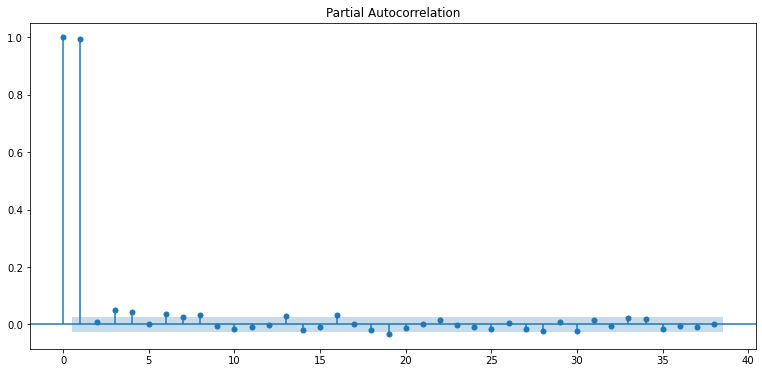

In [247]:
# ACF, PACF 그려보기 -> p,q 구하기.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기.
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기.
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -20.705650
p-value                           0.000000
#Lags Used                       14.000000
Number of Observations Used    5305.000000
Critical Value (1%)              -3.431583
Critical Value (5%)              -2.862085
Critical Value (10%)             -2.567060
dtype: float64


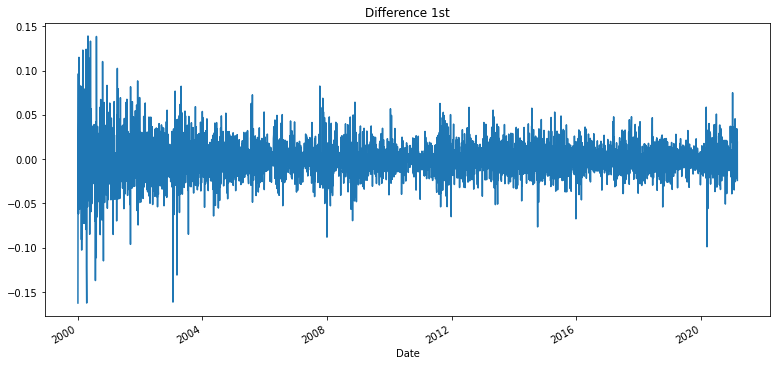

In [248]:
# 차분 안정성 확인 -> d 구하기.
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

In [249]:
from statsmodels.tsa.arima_model import ARIMA

# 모델 설계.
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4787
Model:                 ARIMA(1, 1, 0)   Log Likelihood               11697.259
Method:                       css-mle   S.D. of innovations              0.021
Date:                Thu, 04 Mar 2021   AIC                         -23388.518
Time:                        16:57:02   BIC                         -23369.097
Sample:                             1   HQIC                        -23381.696
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -6.81e-05      0.000     -0.218      0.828      -0.001       0.001
ar.L1.D.Close     0.0282      0.015      1.938      0.053      -0.000       0.057
                                    Root

/home/aiffel-dj20/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj20/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

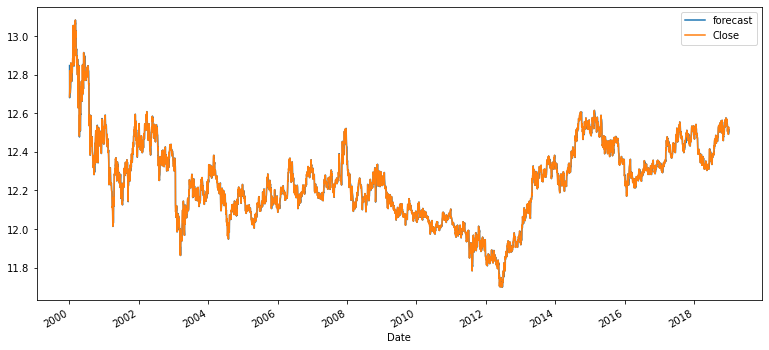

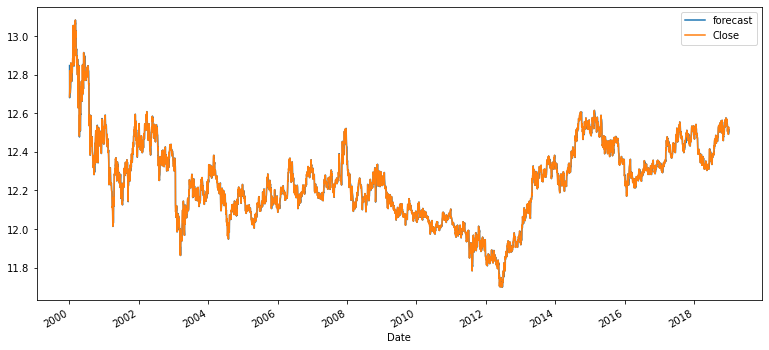

In [250]:
# 훈련 데이터에 ARIMA 모델이 잘 맞는지 시각적으로 확인.
fitted_m.plot_predict()

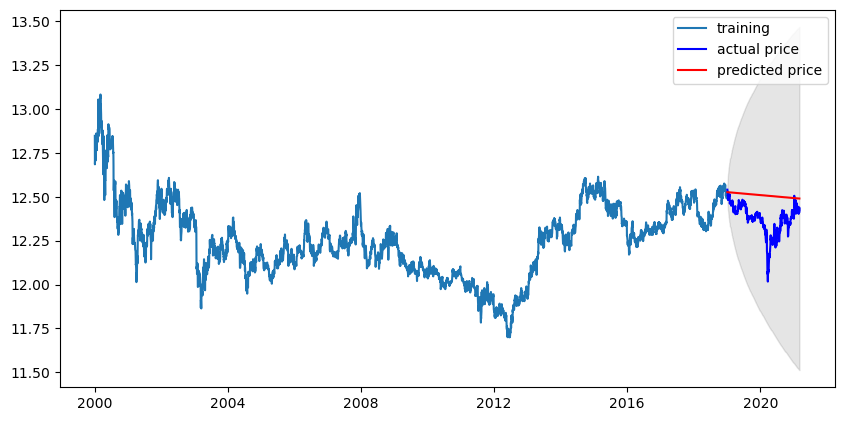

In [251]:
# Forecast(): 테스트 구간의 데이터 예측.
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf.

# Make as pandas series.
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드.
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드.

# Plot.
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [252]:
# 최종 모델의 오차율 계산.
# 로그 변환된 시계열을 사용해 왔던 것을 모두 지수 변환하여 원본의 스케일로 계산해야 타당.
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1479357169.0741582
MAE:  33685.117091609995
RMSE:  38462.41241880387
MAPE: 15.04%


- **MAPE가 낮게 나왔다고 들은 종목들이었는데 10% 미만으로는 내려가지 않음.**

# 루브릭 평가

|**평가항목**|**상세기준**|
|:------|:--------|
|**1. 시계열의 안정성이 충분히 확인되었는가?**|**플로팅과 adfuller 메소드가 모두 적절히 사용되었음.**|
|**2. ARIMA 모델 모수선택 근거를 체계적으로 제시하였는가?**|**p,q를 위한 ACF, PACF 사용과 d를 위한 차분 과정이 명확히 제시.**|
|**3. 예측 모델의 오차율이 기준 이하로 정확하게 나왔는가?**|**3개 이상 종목이 MAPE 10% 미만의 정확도로 예측됨.**|

**1. 안정성은 statsmodels 패키지에서 제공하는 adfuller 메소드를 호출해서 안정성을 확보했다고 생각한다.**     
 
**2. p,q를 위한 ACF, PACF 사용과 d를 위한 차분 과정이 명확히 제시했다고 생각한다. 종목들이 주로 PACF 그래프에서 1 이후부터 절단났기 때문에 p는 대부분 1이었고, 차분도 1회만 주로 했기 때문에 d도 대부분 1이었다.**    

**3. MAPE 10% 미만의 정확도로 예측하는 것은 이뤄내지 못했다. 왜냐하면 MAPE 자체가 데이터 모양의 영향을 많이 받기 때문인 것 같다. 주식이라는 데이터가 일정하게 상승이나 하강을 그리는 데이터가 아니기도 하고 2020년에 코로나라는 큰 쇼크가 한번 왔기 때문에 시계열 데이터의 안정성이 죽은 것 같다.**

# 회고

**주식 예제인 삼성전자 주식 데이터를 돌릴 때만 하더라도 나는 주식을 예측한다는 단꿈에 젖어 미래에 오를 주식들을 모두 사야겠다고 마음먹었다. 하지만 주식을 예측한다는 것이 얼마나 무모한 생각이었는지 비로소 깨닫게 되었다.**    

**MAPE라는 검증 비표가 민감하기 때문에 데이터의 영향을 굉장히 많이 받았다. 조금만 그래프의 모양이 일정하지 않으면 대부분 MAPE가 10%가 넘었다. 스타벅스가 11%대로 가장 낮았다.**      

**다른 수강생들이 MAPE가 낮게 나온다고 소개해준 3개의 종목도 10%는 나왔지만 그 미만으로 내려가지는 않았다. 역시 주식은 남이 소개해준 것 받으면 안되는 건가.**    

**나는 주식이라는 데이터 자체가 예측하기 어렵다고 생각한다. 아무리 안정성을 갖게 조작한 주식 데이터라도 주식은 너무 외부 요소의 영향을 많이 받는다. 반짝 오른 테슬라와 코로나 때문에 힘겨워하는 대한항공을 보면 그렇다. 외부 요소를 다 신경써야하기 때문에 외부적 요소까지 다 넣고 계산하는 인공지능 모델이 아니라면 나는 아직 증권맨의 말을 믿는 게 맞는 것 같다. 아니면 스스로 공부하던가 말이다.**    

**결론은 단꿈은 무너졌다는 것이다. 예측모델을 더 열심히 공부해서 정말 잘 예측하는 모델을 만들거나 주식을 열심히 공부하는 수 밖에 없는 것 같다. 공부만이 살 길이라는 한 점으로 결론이 수렴된 프로젝트였다.**